# WARNING - STOP AND READ THIS FIRST    
For reasons that are detailed in the root README.md, I'm using Cauldron notebooks in this project to display meaningful results. 

*Any Jupyter notebooks are just exploratory chicken scratches and will be essentially meaningless.*

If you want to see meaningful outputs, you have three easy options:
- Option 1: check within this directory for a folder called 'html' - within that directory will be an html file where you can see all the visuals.
- Option 2: go to http://unnotebook.com/reader-install/ and install the reader, and point it to the EDA.cauldron file in this directory. The install is actually fast and easy, and the visuals look the best in this format.
- Option 3: check this directory for a pdf that I've printed from the Cauldron notebook. This is just visuals without code, and the visuals aren't as good as the other two options.

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from tqdm import tqdm

%matplotlib inline
#%matplotlib notebook

In [23]:
df = pd.read_csv('../../data/processed/wrangled_dataframe.csv', header=0, low_memory=False)
df['date'] = pd.to_datetime(df['date'])

In [3]:
dfex = df[:100]
dfex.head()

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
0,1,HE,2013-01-01,8,6,3,6,3,1,93,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
1,56,HE,2013-01-01,8,6,3,6,3,1,93,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2,69,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
3,77,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
4,111,HE,2013-01-01,8,6,3,6,3,1,93,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


In [4]:
di = df.copy()
di['date'] = pd.to_datetime(di.date)
di['week_start'] = pd.to_datetime(di.week_start)
di.set_index('date', inplace=True)

In [5]:
diex = di.copy()
diex = diex[:100]
diex.sort_index(inplace=True)
diex.head()

,store,state,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,HE,8,6,3,6,3,1,93,80,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,56,HE,8,6,3,6,3,1,93,80,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,69,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,77,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,111,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


In [6]:
df['sales'].describe()

count    1.050330e+06
mean     5.591748e+03
std      3.920795e+03
min      0.000000e+00
25%      3.411000e+03
50%      5.628000e+03
75%      7.769000e+03
max      4.155100e+04
Name: sales, dtype: float64

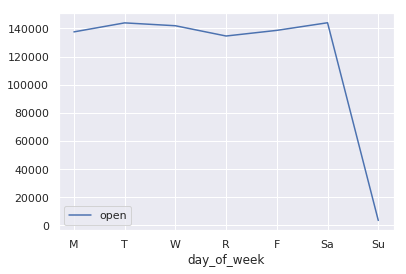

In [7]:
ax = df[['day_of_week', 'open']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

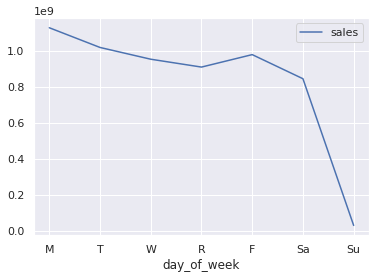

In [8]:
ax = df[['day_of_week', 'sales']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

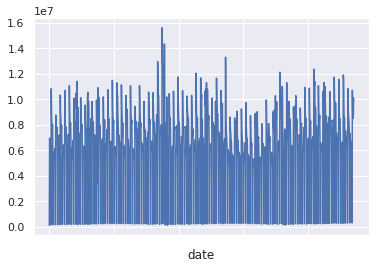

In [399]:
df.groupby('date').sales.sum().plot()

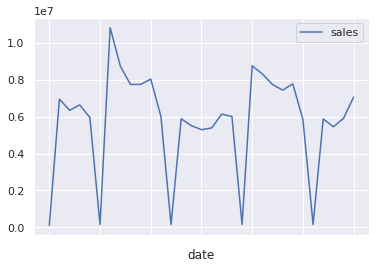

In [9]:
# df[['date', 'sales']].groupby('date').sum().plot()
ax = df.loc[(df.date >= '2013-01-01') & (df.date <= '2013-01-31'), ['date', 'sales']].groupby('date').sum().plot()
#ax.set_xticklabels(pd.date_range('2013-01-06', '2013-01-31'), rotation=60)
#ax.set(xticklabels=pd.date_range('2013-01-06', '2013-01-31'), rotation=60)
#df[['date', 'sales']].groupby('date').resample('BA').sum().plot()

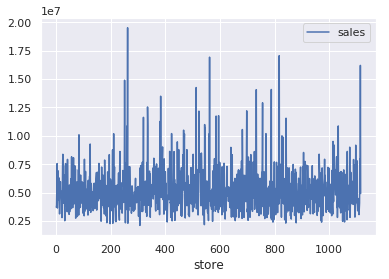

In [10]:
df[['store', 'sales']].groupby('store').sum().plot()

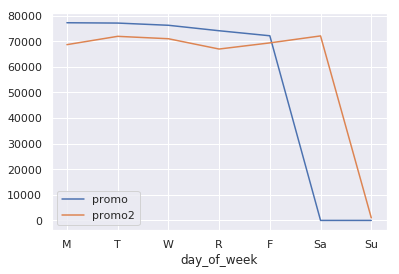

In [11]:
ax = df[['day_of_week', 'promo', 'promo2']].groupby('day_of_week').sum().plot()
ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);
#ax = df.loc[df.open == 1, ['day_of_week', 'promo', 'promo2']].groupby('day_of_week').sum().plot()
#ax.set_xticklabels(['','M', 'T', 'W', 'R', 'F', 'Sa', 'Su']);

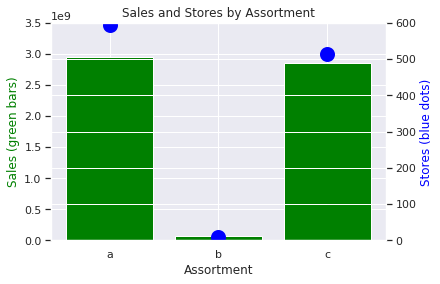

In [12]:
total_sales_by_assortment = df[['sales', 'assortment']].groupby('assortment').sum()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_assortment.index,
         height=np.array(total_sales_by_assortment['sales']).reshape(3,), color='green')
ax_l.set_ylim([0, 3.5e9])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'assortment']].groupby('assortment').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 600])

ax_l.set_title('Sales and Stores by Assortment')
ax_l.set_ylabel('Sales (green bars)', color='green')
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Assortment');

# 9 stores have assortment 'b', while 593 have 'a' and 513 have 'c'
#len(df[df.assortment == 'b'])/942 # 9
#len(df[df.assortment == 'a'])/942 # 593
#len(df[df.assortment == 'c'])/942 # 513

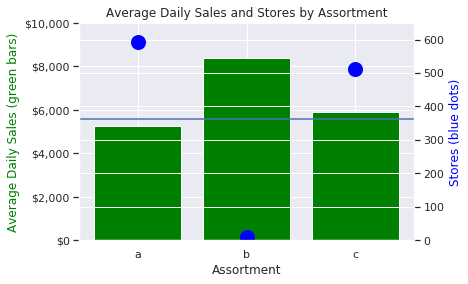

In [13]:
total_sales_by_assortment = df[['sales', 'assortment']].groupby('assortment').sum()
store_counts_by_assortment = (df[['store', 'assortment']].groupby('assortment').count().values/942).reshape(3,)
avg_daily_sales_by_assortment = \
    np.array(total_sales_by_assortment['sales']).reshape(3,) / (store_counts_by_assortment * 942)
avg_daily_sales_by_assortment

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_assortment.index,
         height=avg_daily_sales_by_assortment, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'assortment']].groupby('assortment').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_l.set_title('Average Daily Sales and Stores by Assortment')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Assortment')
ax_l.axhline(df.sales.mean());

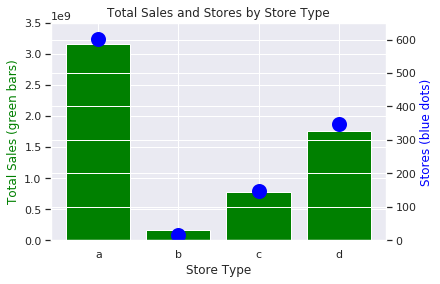

In [14]:
sales_by_store_type = df[['sales', 'store', 'store_type']].groupby('store_type').sum()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=sales_by_store_type.index, height=sales_by_store_type['sales'], color='green')
ax_l.set_ylim([0, 3.5e9])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'store_type']].groupby('store_type').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_r.set_title('Total Sales and Stores by Store Type')
ax_l.set_ylabel('Total Sales (green bars)', color='green')
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Store Type');

# 17 stores have store_type 'b' and 148 stores have store_type 'c', while 602 have 'a' and 348 have 'd'
# len(df[df.store_type == 'b'])/942 # 17
# len(df[df.store_type == 'a'])/942 # 602
# len(df[df.store_type == 'c'])/942 # 148
# len(df[df.store_type == 'd'])/942 # 348

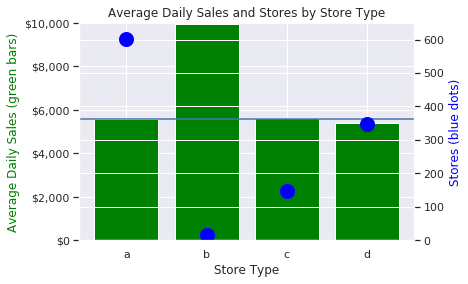

In [15]:
total_sales_by_store_type = df.groupby('store_type').sales.sum()
store_days_by_store_type = (df.groupby('store_type').store.count().values).reshape(4,)
avg_daily_sales_by_store_type = \
    np.array(total_sales_by_store_type).reshape(4,) / store_days_by_store_type
avg_daily_sales_by_store_type

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_store_type.index,
         height=avg_daily_sales_by_store_type, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(store_days_by_store_type/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 650])

ax_l.set_title('Average Daily Sales and Stores by Store Type')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('Store Type')
ax_l.axhline(df.sales.mean());

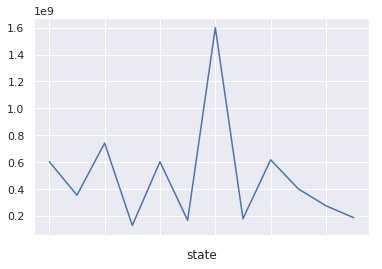

In [16]:
ax = df.groupby('state').sales.sum().plot()
ax.set_xlabel = df['state'].unique()

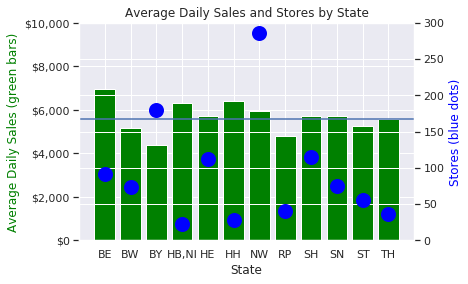

In [17]:
total_sales_by_state = df[['sales', 'state']].groupby('state').sum()
store_counts_by_state = (df[['store', 'state']].groupby('state').count().values/942).reshape(12,)
avg_daily_sales_by_state = \
    np.array(total_sales_by_state['sales']).reshape(12,) / (store_counts_by_state * 942)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_state.index,
         height=avg_daily_sales_by_state, color='green')
ax_l.set_ylim([0, 10000])
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'state']].groupby('state').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 300])

ax_l.set_title('Average Daily Sales and Stores by State')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('State')
ax_l.axhline(df.sales.mean());

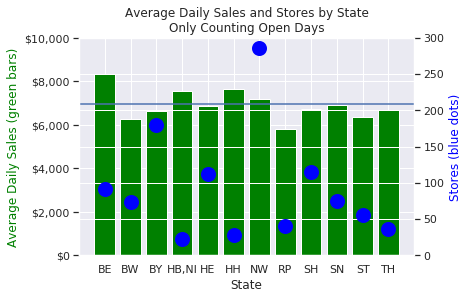

In [18]:
# Same chart as above but restricted only to open stores
open = df[df.open == 1]
total_sales_by_state = open[['sales', 'state']].groupby('state').sum()
store_counts_by_state = (open[['store', 'state']].groupby('state').count().values/942).reshape(12,)
avg_daily_sales_by_state = \
    np.array(total_sales_by_state['sales']).reshape(12,) / (store_counts_by_state * 942)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=total_sales_by_state.index,
         height=avg_daily_sales_by_state, color='green')
ax_l.set_ylim([0, 10000])
# Note that here we're plotting by df (including days closed) rather than 'open' because each store may be open 
# less than 942 days - the variable being plotted is a basic store count, not store*days, so I just used df
# Divide by 942 because there are 942 days in the data set
ax_r.plot(df[['store', 'state']].groupby('state').count()/942, color='blue', linestyle='none',
          marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 300])

ax_l.set_title('Average Daily Sales and Stores by State\nOnly Counting Open Days')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_ylabel('Stores (blue dots)', color='blue')
ax_l.set_xlabel('State')
ax_l.axhline(open.sales.mean());

In [19]:
#open.store.nunique()
#len(df) # 1050330
#len(open) # 844340
#len(df) - len(open) # 205990
#open.date.nunique() # 942
#df.date.nunique() # 942

942

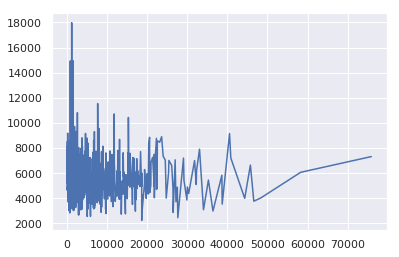

In [54]:
# No relationship between daily avg sales and nearest competition
total_sales_by_competition_distance = \
    np.array(df[['competition_distance', 'sales']].groupby('competition_distance').sum()[['sales']]).reshape(-1)
store_counts_by_competition_distance = \
    np.array(df[['competition_distance', 'store']].groupby('competition_distance').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_distance = \
    total_sales_by_competition_distance / (store_counts_by_competition_distance * 942)
xs = np.array((df[['competition_distance', 'sales']].groupby('competition_distance').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_distance);

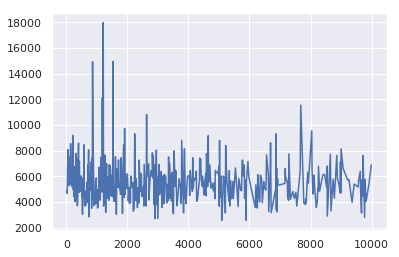

In [55]:
# No relationship between daily avg sales and nearest competition - even for <10km
u10 = df[df.competition_distance <= 10000]
total_sales_by_competition_distance = \
    np.array(u10[['competition_distance', 'sales']].groupby('competition_distance').sum()[['sales']]).reshape(-1)
store_counts_by_competition_distance = \
    np.array(u10[['competition_distance', 'store']].groupby('competition_distance').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_distance = \
    total_sales_by_competition_distance / (store_counts_by_competition_distance * 942)
xs = np.array((u10[['competition_distance', 'sales']].groupby('competition_distance').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_distance);

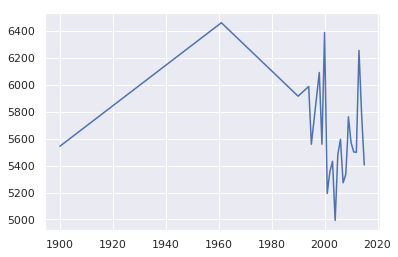

In [56]:
# Weird chart but looks like a rough correlation since 2000
total_sales_by_competition_open_since_year = \
    np.array(df[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_year = \
    np.array(df[['competition_open_since_year', 'store']].groupby('competition_open_since_year').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_year = \
    total_sales_by_competition_open_since_year / (store_counts_by_competition_open_since_year * 942)
xs = np.array((df[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_year);

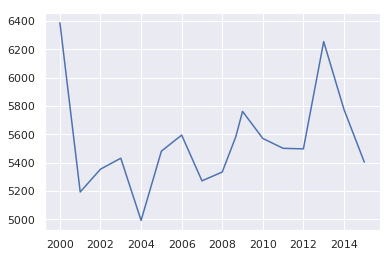

In [57]:
# Rough correlation since 2000 - check the store counts
s2000 = df[df.competition_open_since_year >= 2000]
total_sales_by_competition_open_since_year = \
    np.array(s2000[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_year = \
    np.array(s2000[['competition_open_since_year', 'store']].groupby('competition_open_since_year').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_year = \
    total_sales_by_competition_open_since_year / (store_counts_by_competition_open_since_year * 942)
xs = np.array((s2000[['competition_open_since_year', 'sales']].groupby('competition_open_since_year').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_year);

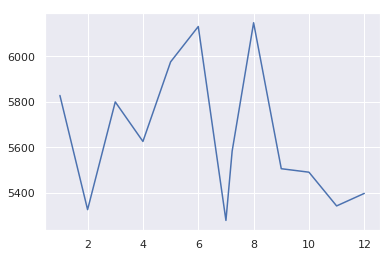

In [58]:
# Should be no correlation between which month the competition opened and avg sales
total_sales_by_competition_open_since_month = \
    np.array(df[['competition_open_since_month', 'sales']].groupby('competition_open_since_month').sum()[['sales']]).reshape(-1)
store_counts_by_competition_open_since_month = \
    np.array(df[['competition_open_since_month', 'store']].groupby('competition_open_since_month').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_competition_open_since_month = \
    total_sales_by_competition_open_since_month / (store_counts_by_competition_open_since_month * 942)
xs = np.array((df[['competition_open_since_month', 'sales']].groupby('competition_open_since_month').sum()).index)
plt.plot(xs, avg_daily_sales_by_competition_open_since_month);

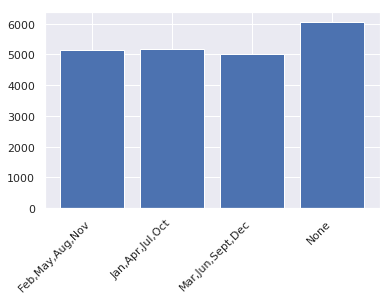

In [608]:
# At first glance, little difference between PromoInterval avg store sales
avg_daily_sales_by_promo_interval = df.groupby('promo_interval').sales.mean()
fig, ax = plt.subplots()
ax = plt.bar(x=avg_daily_sales_by_promo_interval.index, height=avg_daily_sales_by_promo_interval);
fig.autofmt_xdate(rotation=45, ha='right')

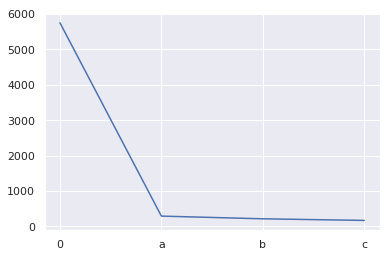

In [60]:
# Hardly anything gets sold on a state holiday - check that this is accurate if used
total_sales_by_state_holiday = \
    np.array(df[['state_holiday', 'sales']].groupby('state_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_state_holiday = \
    np.array(df[['state_holiday', 'store']].groupby('state_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_state_holiday = \
    total_sales_by_state_holiday / (store_counts_by_state_holiday)
xs = np.array((df[['state_holiday', 'sales']].groupby('state_holiday').sum()).index)
plt.plot(xs, avg_daily_sales_by_state_holiday);

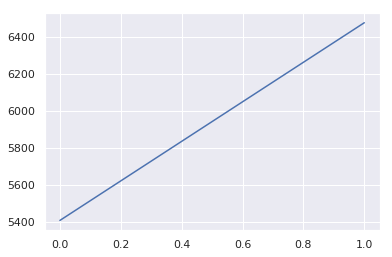

In [61]:
# School holidays are good for business - check that this is accurate if used
total_sales_by_school_holiday = \
    np.array(df[['school_holiday', 'sales']].groupby('school_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_school_holiday = \
    np.array(df[['school_holiday', 'store']].groupby('school_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_school_holiday = \
    total_sales_by_school_holiday / (store_counts_by_school_holiday)
xs = np.array((df[['school_holiday', 'sales']].groupby('school_holiday').sum()).index)
plt.plot(xs, avg_daily_sales_by_school_holiday);

0.9008549279208763

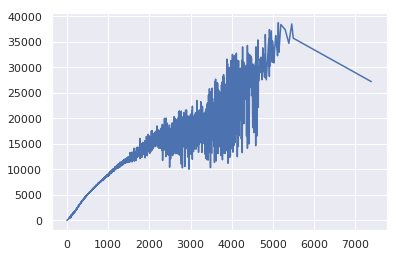

In [62]:
# Sales are highly correlated with # of customers
total_sales_by_customers = \
    np.array(df[['customers', 'sales']].groupby('customers').sum()[['sales']]).reshape(-1)
store_counts_by_customers = \
    np.array(df[['customers', 'store']].groupby('customers').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_customers = \
    total_sales_by_customers / (store_counts_by_customers * 942)
xs = np.array((df[['customers', 'sales']].groupby('customers').sum()).index)
plt.plot(xs, avg_daily_sales_by_customers);
df['sales'].corr(df['customers'])

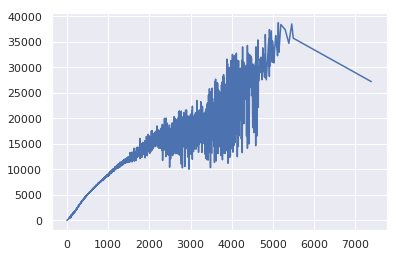

In [12]:
avg_sales_by_customers = df.groupby('customers').sales.mean()
plt.plot(avg_sales_by_customers)

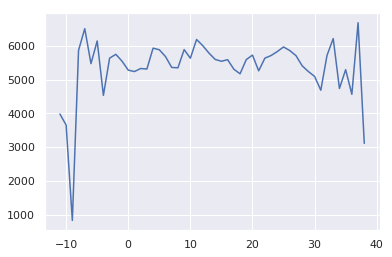

In [63]:
# Except at extreme temperatures, not much correlation between max_temperature_c and sales
total_sales_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_max_temperature_c = \
    np.array(df[['max_temperature_c', 'store']].groupby('max_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_max_temperature_c = \
    total_sales_by_max_temperature_c / (store_counts_by_max_temperature_c * 942)
xs = np.array((df[['max_temperature_c', 'sales']].groupby('max_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_max_temperature_c);

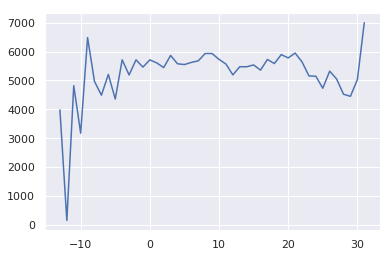

In [64]:
# Except at extreme temperatures, not much correlation between mean_temperature_c and sales
total_sales_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()[['sales']]).reshape(-1)
store_counts_by_mean_temperature_c = \
    np.array(df[['mean_temperature_c', 'store']].groupby('mean_temperature_c').count()[['store']]).reshape(-1) / 942
avg_daily_sales_by_mean_temperature_c = \
    total_sales_by_mean_temperature_c / (store_counts_by_mean_temperature_c * 942)
xs = np.array((df[['mean_temperature_c', 'sales']].groupby('mean_temperature_c').sum()).index)
plt.plot(xs, avg_daily_sales_by_mean_temperature_c);

In [65]:
df.groupby('events').count()['store'].sort_values()
df.sales.mean()

5591.74794873992

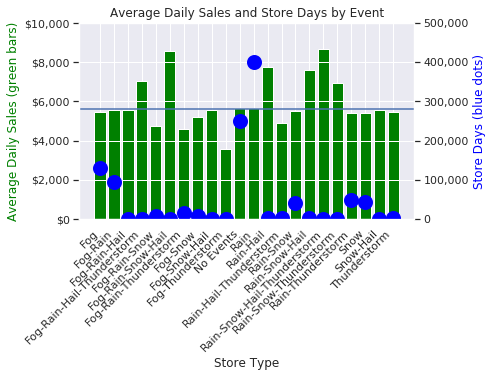

In [66]:
total_sales_by_events = \
    np.array(df[['events', 'sales']].groupby('events').sum()[['sales']]).reshape(-1)
store_counts_by_events = \
    np.array(df[['events', 'store']].groupby('events').count()[['store']]).reshape(-1)
avg_daily_sales_by_events = \
    total_sales_by_events / store_counts_by_events
xs = np.array((df[['events', 'sales']].groupby('events').sum()).index)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_events, color='green')
ax_l.set_ylim([0, 10000])
ax_r.plot(xs, store_counts_by_events, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 500000])

ax_l.set_title('Average Daily Sales and Store Days by Event')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('Store Type')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(df.sales.mean());

In [67]:
#len(df[(df.promo == 1) & (df.open == 0)]) # 11203, before the merge_dfs function was changed
#len(df[(df.promo == 1) & (df.sales == 0)]) # 11205, before the merge_dfs function was changed
#(df[(df.promo == 1) & (df.sales == 0)]).head()
#len(df[(df.promo2 == 1) & (df.open == 0)]) # 116835
#(df[(df.promo2 == 1) & (df.open == 0)]).head()
#len(df[(df.promo == 1) & (df.open == 0)]) # 0
len(df[(df.promo == 1) & (df.sales == 0) & (df.open == 1)]) # 2
#(df[(df.promo == 1) & (df.sales == 0) & (df.open == 1)]) 
len(df[(df.promo2 == 1) & (df.open == 0)]) # 0
len(df[(df.promo2 == 1) & (df.sales == 0) & (df.open == 1)]) # 1
(df[(df.promo == 1) & (df.customers <= 100) & (df.open == 1)]).sort_values('customers')

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
277836,1100,NW,2014-04-29,14,12,11,13,12,11,96,...,"Jan,Apr,Jul,Oct",1,0.0,3.0,1.0,1.0,0,0.0,77,2014-04-27
873140,948,BW,2013-04-25,24,16,7,9,7,4,87,...,None,3,0.0,5.0,1.0,1.0,0,0.0,69,2013-04-21
507039,1093,SN,2013-06-03,11,9,7,10,8,7,100,...,None,0,133.0,18.0,1.0,1.0,0,0.0,45,2013-06-02
1030592,175,HH,2013-08-26,23,17,12,11,9,5,88,...,None,0,316.0,44.0,1.0,1.0,0,0.0,73,2013-08-25
996073,151,ST,2014-03-21,21,14,5,8,5,3,84,...,None,4,775.0,68.0,1.0,1.0,0,0.0,72,2014-03-16
43107,942,HE,2014-01-20,4,2,-1,4,3,-1,100,...,"Jan,Apr,Jul,Oct",0,1333.0,94.0,1.0,1.0,0,0.0,63,2014-01-19
424433,609,BE,2013-06-19,33,26,18,20,17,14,78,...,None,2,760.0,97.0,1.0,1.0,0,1.0,71,2013-06-16


In [68]:
open = df[df.open == 1]
non_promo_sales_by_state = open.loc[open.promo == 0, ['sales', 'state']].groupby('state').sum()
non_promo_store_sales_days_by_state = \
    (open.loc[open.promo == 0, ['store', 'state']].groupby('state').count().values).reshape(12,)
promo_sales_by_state = open.loc[open.promo == 1, ['sales', 'state']].groupby('state').sum()
promo_store_sales_days_by_state = \
    (open.loc[open.promo == 1, ['store', 'state']].groupby('state').count().values).reshape(12,)
avg_daily_non_promo_sales_by_state = non_promo_sales_by_state['sales'].values/non_promo_store_sales_days_by_state
avg_daily_non_promo_sales_by_state = non_promo_sales_by_state['sales'].values/non_promo_store_sales_days_by_state


avg_daily_non_promo_sales_by_state
open.loc[df.promo == 0, 'sales'].mean()

5929.826183034807

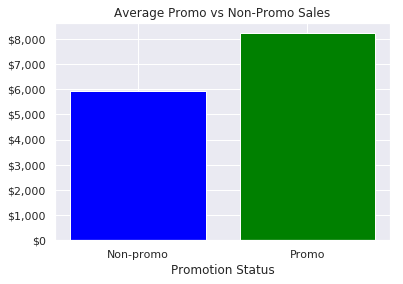

In [69]:
# Promo vs non-promo sales by state
open = df[df.open == 1]

avg_promo_sales = open.loc[open.promo == 1, 'sales'].mean()
avg_non_promo_sales = open.loc[open.promo == 0, 'sales'].mean()

fig, ax = plt.subplots()

ax.bar(x=['Non-promo', 'Promo'],
       height=[avg_non_promo_sales, avg_promo_sales], color=['blue', 'green'])
ax_l.set_ylim([0, 10000])

ax.set_title('Average Promo vs Non-Promo Sales')
ax_l.set_ylabel('Avg Daily Sales')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('Promotion Status');

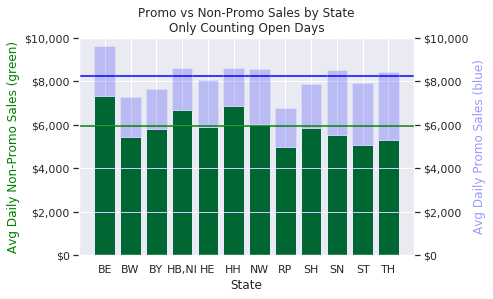

In [70]:
# Promo vs non-promo sales by state
open = df[df.open == 1]
non_promo_sales_by_state = open.loc[open.promo == 0, ['sales', 'state']].groupby('state').sum()
non_promo_store_sales_days_by_state = \
    (open.loc[open.promo == 0, ['store', 'state']].groupby('state').count().values).reshape(12,)
avg_daily_non_promo_sales_by_state = (non_promo_sales_by_state['sales'].values)/non_promo_store_sales_days_by_state
avg_daily_promo_sales = open.loc[df.promo == 1, 'sales'].mean()

promo_sales_by_state = open.loc[open.promo == 1, ['sales', 'state']].groupby('state').sum()
promo_store_sales_days_by_state = \
    (open.loc[open.promo == 1, ['store', 'state']].groupby('state').count().values).reshape(12,)
avg_daily_promo_sales_by_state = promo_sales_by_state['sales'].values/promo_store_sales_days_by_state
avg_daily_non_promo_sales = open.loc[df.promo == 0, 'sales'].mean()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=non_promo_sales_by_state.index,
         height=avg_daily_non_promo_sales_by_state, color='green')#, alpha=0.6)
ax_l.set_ylim([0, 10000])
ax_r.bar(x=promo_sales_by_state.index, height=avg_daily_promo_sales_by_state, color='blue', alpha=0.2)
          #color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 10000])

ax_l.set_title('Promo vs Non-Promo Sales by State\nOnly Counting Open Days')
ax_l.set_ylabel('Avg Daily Non-Promo Sales (green)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['${:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Avg Daily Promo Sales (blue)', color='blue', alpha=0.4)
ax_l.set_xlabel('State')
ax_r.axhline(avg_daily_non_promo_sales, color='green', linestyle='-')
ax_l.axhline(avg_daily_promo_sales, color='blue', linestyle='-');

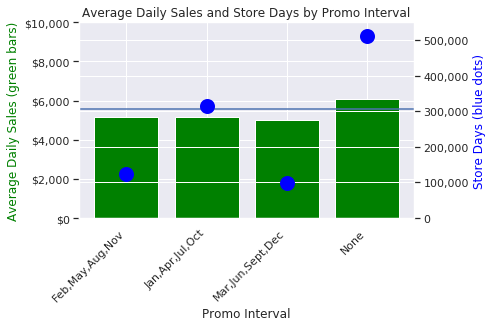

In [71]:
total_sales_by_promo_interval = \
    np.array(df[['promo_interval', 'sales']].groupby('promo_interval').sum()[['sales']]).reshape(-1)
store_counts_by_promo_interval = \
    np.array(df[['promo_interval', 'store']].groupby('promo_interval').count()[['store']]).reshape(-1)
avg_daily_sales_by_promo_interval = \
    total_sales_by_promo_interval / store_counts_by_promo_interval
xs = np.array((df[['promo_interval', 'sales']].groupby('promo_interval').sum()).index)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_promo_interval, color='green')
ax_l.set_ylim([0, 10000])
ax_r.plot(xs, store_counts_by_promo_interval, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 550000])

ax_l.set_title('Average Daily Sales and Store Days by Promo Interval')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('Promo Interval')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(df.sales.mean());

In [ ]:
#open.loc[open.promo2 == 1, 'state'].unique()
#open = df[df.open == 1]
#len(open) # 844340
#promo2_states = open.loc[open.promo2 == 1, 'state'].unique()
#promo2 = open[open.state.apply(lambda x: x in list(promo2_states))].head()
#list(promo2_states)
#len(df[df.promo2 == 1]) #421047
#len(df[df.promo2 == 0]) #629283
#df.groupby('store')['promo2'].count().max() == 942
#sorted(open.loc[open.promo2 == 1, 'state'].unique()) #       ['BW', 'BY',          'HE', 'HH', 'NW', 'RP', 'SH', 'SN', 'ST', 'TH']
#sorted(open.loc[open.promo2 == 0, 'state'].unique()) # ['BE', 'BW', 'BY', 'HB,NI', 'HE', 'HH', 'NW', 'RP', 'SH', 'SN', 'ST', 'TH']

['BE', 'BW', 'BY', 'HB,NI', 'HE', 'HH', 'NW', 'RP', 'SH', 'SN', 'ST', 'TH']

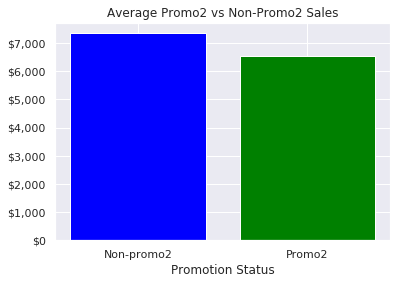

In [ ]:
# Promo2 vs non-promo2 sales by state
open = df[df.open == 1]

avg_promo2_sales = open.loc[open.promo2 == 1, 'sales'].mean()
avg_non_promo2_sales = open.loc[open.promo2 == 0, 'sales'].mean()

fig, ax = plt.subplots()

ax.bar(x=['Non-promo2', 'Promo2'],
       height=[avg_non_promo2_sales, avg_promo2_sales], color=['blue', 'green'])
ax_l.set_ylim([0, 10000])

ax.set_title('Average Promo2 vs Non-Promo2 Sales')
ax_l.set_ylabel('Avg Daily Sales')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('Promotion Status');

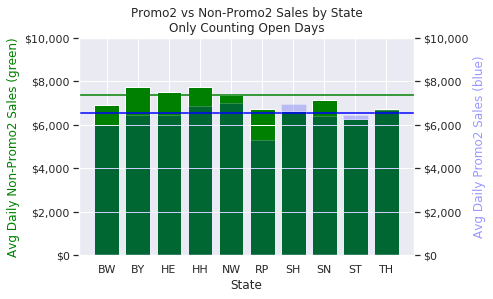

In [ ]:
# Promo2 vs non-promo2 sales by state
open = df[df.open == 1]
promo2_states_list = list(open.loc[open.promo2 == 1, 'state'].unique())

promo2_states = open[open.state.isin(promo2_states_list)]
non_promo2_sales_by_state = promo2_states.loc[(promo2_states.promo2 == 0), ['sales', 'state']].groupby('state').sum()
non_promo2_store_sales_days_by_state = \
    (promo2_states.loc[(promo2_states.promo2 == 0), ['store', 'state']].groupby('state').count().values).reshape(10,)
avg_daily_non_promo2_sales_by_state = (non_promo2_sales_by_state['sales'].values)/non_promo2_store_sales_days_by_state
avg_daily_non_promo2_sales = open.loc[df.promo2 == 0, 'sales'].mean()

promo2_sales_by_state = promo2_states.loc[promo2_states.promo2 == 1, ['sales', 'state']].groupby('state').sum()
promo2_store_sales_days_by_state = \
    (promo2_states.loc[promo2_states.promo2 == 1, ['store', 'state']].groupby('state').count().values).reshape(10,)
avg_daily_promo2_sales_by_state = promo2_sales_by_state['sales'].values/promo2_store_sales_days_by_state
avg_daily_promo2_sales = open.loc[df.promo2 == 1, 'sales'].mean()

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=non_promo2_sales_by_state.index, height=avg_daily_non_promo2_sales_by_state, color='green')#, alpha=0.6)
ax_l.set_ylim([0, 10000])
ax_r.bar(x=promo2_sales_by_state.index, height=avg_daily_promo2_sales_by_state, color='blue', alpha=0.2)
          #color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
ax_r.set_ylim([0, 10000])

ax_l.set_title('Promo2 vs Non-Promo2 Sales by State\nOnly Counting Open Days')
ax_l.set_ylabel('Avg Daily Non-Promo2 Sales (green)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['${:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Avg Daily Promo2 Sales (blue)', color='blue', alpha=0.4)
ax_l.set_xlabel('State')
ax_r.axhline(avg_daily_non_promo2_sales, color='green', linestyle='-')
ax_l.axhline(avg_daily_promo2_sales, color='blue', linestyle='-');

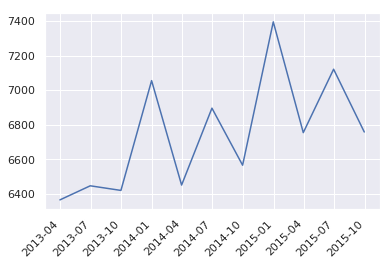

In [ ]:
df.promo_interval.unique()
#jan = open[open.promo_interval == 'Jan,Apr,Jul,Oct']
#plt.plot(jan.sales)
#di = df.copy()
#di['date'] = pd.to_datetime(di.date)
#di['week_start'] = pd.to_datetime(di.week_start)
#di.set_index(['date'], inplace=True)

jan = di[di.promo_interval == 'Jan,Apr,Jul,Oct']
jan = jan[jan.open == 1]
#plt.plot(jan.sales)
#plt.plot(jan.unstack('store').sales.sum())
fig, ax = plt.subplots()
ax.plot(jan.sales.resample('Q').mean())
fig.autofmt_xdate(rotation=45, ha='right')

In [ ]:
di.head()

,store,state,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,...,promo_interval,day_of_week,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,HE,8,6,3,6,3,1,93,80,...,None,1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,56,HE,8,6,3,6,3,1,93,80,...,"Mar,Jun,Sept,Dec",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,69,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,77,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30
2013-01-01,111,HE,8,6,3,6,3,1,93,80,...,"Jan,Apr,Jul,Oct",1,0.0,0.0,0.0,0.0,a,1.0,61,2012-12-30


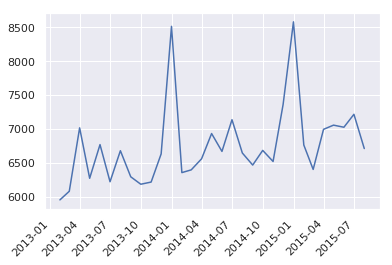

In [ ]:
jopen = di[di.open == 1]
jan = jopen.query('promo_interval == "Jan,Apr,Jul,Oct" & promo2_since_year <= 2012')
fig, ax = plt.subplots()
ax.plot(jan.groupby(pd.Grouper(freq='M')).sales.mean())
fig.autofmt_xdate(rotation=45, ha='right')

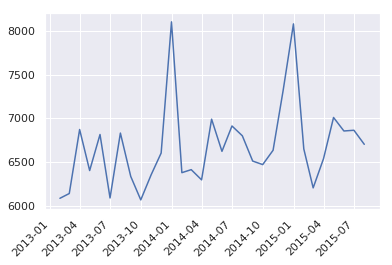

In [ ]:
jopen = di[di.open == 1]
feb = jopen.query('promo_interval == "Feb,May,Aug,Nov" & promo2_since_year <= 2012')
fig, ax = plt.subplots()
ax.plot(feb.groupby(pd.Grouper(freq='M')).sales.mean())
fig.autofmt_xdate(rotation=45, ha='right')

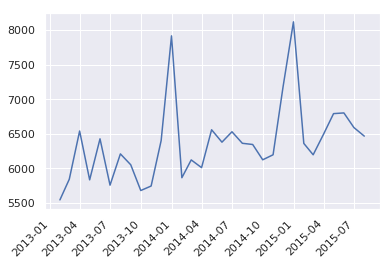

In [ ]:
jopen = di[di.open == 1]
mar = jopen.query('promo_interval == "Mar,Jun,Sept,Dec" & promo2_since_year <= 2012')
fig, ax = plt.subplots()
ax.plot(mar.groupby(pd.Grouper(freq='M')).sales.mean())
fig.autofmt_xdate(rotation=45, ha='right')

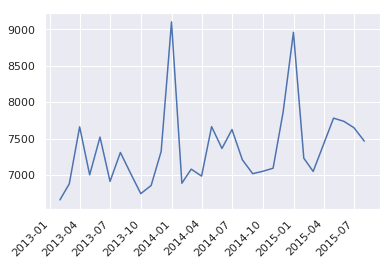

In [ ]:
jopen = di[di.open == 1]
none = jopen[jopen.promo_interval == 'None']
fig, ax = plt.subplots()
ax.plot(none.groupby(pd.Grouper(freq='M')).sales.mean())
fig.autofmt_xdate(rotation=45, ha='right')

In [35]:
ex = pd.to_datetime('2013-01-01')
ex.dayofweek
#pd.to_datetime({'year': '2013', 'week': '10', 'day': '0'})
#pd.to_datetime('2013', '10', '0')
ex_y = 2013.0
ex_w = 10.0
d = '2013-U1'
import datetime
#ex = datetime.datetime.strptime(d + '-0', "%Y-U%U-%w")
ex = datetime.datetime.strptime(f'{str(int(ex_y))}-{str(int(ex_w))}-0', '%Y-%U-%w')
ex = pd.to_datetime(datetime.datetime.strptime(f'{str(int(ex_y))}-{str(int(ex_w))}-0', '%Y-%U-%w'))
#ex = pd.to_datetime(f'{str(int(ex_y))}-{str(int(ex_w))}-0', '%Y-%U-%w')
#pd.to_datetime(ex)
ex

Timestamp('2013-03-10 00:00:00')

# Here is Promo2 stuff with regression

In [555]:
di.loc[(di.promo2_since_year == 2014) & (di.state != 'BY'), 'promo2_since_week'].value_counts()/942

10.0    29.0
18.0     6.0
45.0     3.0
1.0      3.0
14.0     1.0
23.0     1.0
Name: promo2_since_week, dtype: float64

0.17552417243389729 -0.32863906072732835


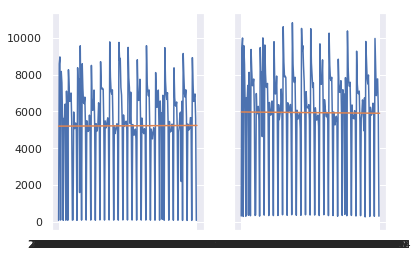

In [587]:
di.promo2_since_year.value_counts()/942
#di.loc[(di.promo2_since_year == 2013) & (di.state != 'BY'), 'promo2_since_week'].value_counts()/942
di.loc[(di.promo2_since_year == 2013), 'promo2_since_week'].value_counts()/942
#pd.to_datetime('2013-08-11') - pd.to_timedelta(15, unit='W') # Timestamp('2013-04-28 00:00:00')
#pd.to_datetime('2013-08-11') + pd.to_timedelta(15, unit='W') # Timestamp('2013-11-24 00:00:00')
#pd.to_datetime('2013-08-11').strftime('%Y-%W') # 2013 - 31
#pd.to_datetime('2013-04-28').strftime('%Y-%W') # 2014 - 16
#pd.to_datetime('2013-11-24').strftime('%Y-%W') # 2014 - 46

promo2 = df[(df.date >= '2013-04-28') & (df.date <= '2013-11-24') & (df.promo2 == 1)]
non_promo2 = df[(df.date >= '2013-04-28') & (df.date <= '2013-11-24') & (df.promo2 == 0)]
avg_sales_by_promo2 =  promo2[['date', 'sales']].groupby('date').mean()[['sales']]
avg_sales_by_non_promo2 = non_promo2[['date', 'sales']].groupby('date').mean()[['sales']]
fig, (ax0, ax1) = plt.subplots(1, 2, sharex='col', sharey='row')
xs = np.linspace(0, 211, 211)
a0, b0 = np.polyfit(xs, avg_sales_by_promo2.sales, deg=1)
a1, b1 = np.polyfit(xs, avg_sales_by_non_promo2.sales, deg=1)
ax0.plot(avg_sales_by_promo2)
ax0.plot(xs, a0*xs + b0)
ax1.plot(avg_sales_by_non_promo2)
ax1.plot(xs, a1*xs + b1)
print(a0, a1)

-3.3968840580371187 -3.600064333050801


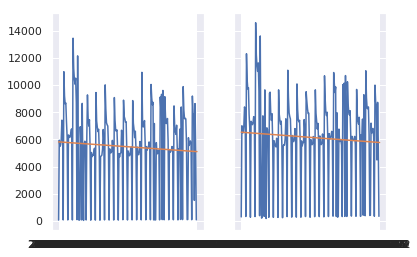

In [588]:
#pd.to_datetime('2014-03-09') - pd.to_timedelta(15, unit='W') # Timestamp('2013-11-24 00:00:00')
#pd.to_datetime('2014-03-09') + pd.to_timedelta(15, unit='W') # Timestamp('2014-06-22 00:00:00')
#pd.to_datetime('2014-03-09').strftime('%Y-%W') # 2014 - 09
#pd.to_datetime('2013-11-24').strftime('%Y-%W') # 2013 - 46
#pd.to_datetime('2014-06-22').strftime('%Y-%W') # 2014 - 24

promo2 = df[(df.date >= '2013-11-24') & (df.date <= '2014-06-22') & (df.promo2 == 1)]
non_promo2 = df[(df.date >= '2013-11-24') & (df.date <= '2014-06-22') & (df.promo2 == 0)]
avg_sales_by_promo2 =  promo2[['date', 'sales']].groupby('date').mean()[['sales']]
avg_sales_by_non_promo2 = non_promo2[['date', 'sales']].groupby('date').mean()[['sales']]
fig, (ax0, ax1) = plt.subplots(1, 2, sharex='col', sharey='row')
xs = np.linspace(0, 211, 211)
a0, b0 = np.polyfit(xs, avg_sales_by_promo2.sales, deg=1)
a1, b1 = np.polyfit(xs, avg_sales_by_non_promo2.sales, deg=1)
ax0.plot(avg_sales_by_promo2)
ax0.plot(xs, a0*xs + b0)
ax1.plot(avg_sales_by_non_promo2)
ax1.plot(xs, a1*xs + b1)
print(a0, a1)

In [491]:
promo2 = di.query('promo2 == 1 and (promo2_since_year > 2013 or (promo2_since_year == 2013 and promo2_since_week > 1))').copy()
promo2['p2y'] = (promo2.promo2_since_year.astype(int)).astype(str)
promo2['p2w'] = (promo2.promo2_since_week.astype(int)).astype(str)
promo2['p24dt'] = promo2['p2y'] + '-' + promo2['p2w'] + '-0'
promo2['p2dt'] = promo2['p24dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%U-%w'))
promo2[['promo2_since_year', 'promo2_since_week', 'p2y', 'p2w', 'p24dt', 'p2dt']].head(30)

,promo2_since_year,promo2_since_week,p2y,p2w,p24dt,p2dt
date,,,,,,
2013-01-01,2014.0,10.0,2014,10,2014-10-0,2014-03-09
2013-01-01,2014.0,10.0,2014,10,2014-10-0,2014-03-09
2013-01-01,2013.0,5.0,2013,5,2013-5-0,2013-02-03
2013-01-01,2013.0,10.0,2013,10,2013-10-0,2013-03-10
2013-01-01,2014.0,45.0,2014,45,2014-45-0,2014-11-09
2013-01-01,2013.0,31.0,2013,31,2013-31-0,2013-08-04
2013-01-01,2014.0,45.0,2014,45,2014-45-0,2014-11-09
2013-01-01,2014.0,45.0,2014,45,2014-45-0,2014-11-09
2013-01-01,2013.0,18.0,2013,18,2013-18-0,2013-05-05


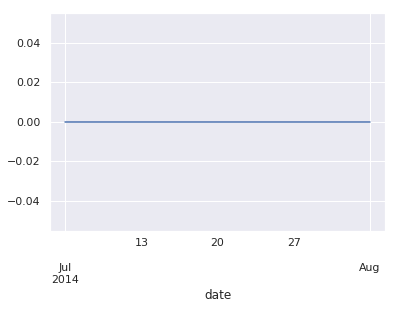

In [77]:
len(p240['2014-07-01':'2014-08-01'])
p240['2014-07-01':'2014-08-01'].sales.resample('W').sum().plot()

# Stuff on stores closing Jul-Dec 2014

In [283]:
dx = df.copy()
dx['date'] = pd.to_datetime(dx['date'])
dx['moyr'] = dx.date.apply(lambda x: x.strftime('%B-%Y'))
dy = dx.groupby(['state', 'store', 'moyr']).sum()
dy.reset_index(level=[0,1,2], drop=False, inplace=True)
dy['moyr'] = pd.to_datetime(dy['moyr'])
dy.head()

,state,store,moyr,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,promo2,promo2_since_week,promo2_since_year,day_of_week,sales,customers,open,promo,school_holiday,trend
0,BE,4,2013-04-01,398,271,140,153,74,-12,2573,...,0,707.863398,60352.907180,85,226981.0,32197.0,25.0,12.0,5.0,1867
1,BE,4,2014-04-01,507,358,210,251,165,67,2689,...,0,707.863398,60352.907180,87,231535.0,32140.0,24.0,11.0,10.0,1845
2,BE,4,2015-04-01,440,272,101,159,52,-57,2696,...,0,707.863398,60352.907180,89,248088.0,32897.0,24.0,11.0,8.0,1813
3,BE,4,2013-08-01,758,608,453,459,378,296,2753,...,0,731.458844,62364.670753,96,238263.0,34544.0,27.0,12.0,2.0,2287
4,BE,4,2014-08-01,708,555,400,421,328,214,2785,...,0,731.458844,62364.670753,99,258473.0,34404.0,26.0,11.0,16.0,2156


In [403]:
#dz = df.copy()
#dz['date'] = pd.to_datetime(dz['date'])
#dz['year'] = dz.date.dt.year
#dz['month'] = dz.date.dt.month
sums = dz.groupby(['store', 'year', 'month']).sum().copy()
sums.reset_index(level=2, drop=False, inplace=True)
sums[(sums.sales == 0) & (sums.month.isin(range(7)))]

month  max_temperature_c  mean_temperature_c  min_temperature_c  \
store year                                                                    
103   2013      1                 56                  -8                -67   
      2013      2                 55                   3                -45   
      2013      3                 79                 -24               -133   
      2013      4                398                 271                140   
      2013      5                592                 437                292   
      2013      6                669                 524                376   
349   2013      1                 56                  -8                -67   
      2013      2                 55                   3                -45   
      2013      3                 79                 -24               -133   
589   2013      4                439                 307                181   
972   2014      6                651                 488                324   
1081  2013      1                 56                  -8                -67   
      2013      2                 55                   3                -45   
      2013      3                 79                 -24               -133   
      2013      4                398                 271                140   
      2013      5                592                 437                292   
      2013      6                669                 524                376   

            dew_point_c  mean_dew_point_c  min_dew_point_c  max_humidity  \
store year                                                                 
103   2013           12               -47             -117          2961   
      2013           -2               -48              -99          2702   
      2013          -96              -161             -225          2805   
      2013          153                74              -12          2573   
      2013          338               255              167          2760   
      2013          409               326              241          2632   
349   2013           12               -47             -117          2961   
      2013           -2               -48              -99          2702   
      2013          -96              -161             -225          2805   
589   2013          186               101               22          2561   
972   2014          391               324              254          2697   
1081  2013           12               -47             -117          2961   
      2013           -2               -48              -99          2702   
      2013          -96              -161             -225          2805   
      2013          153                74              -12          2573   
      2013          338               255              167          2760   
      2013          409               326              241          2632   

            mean_humidity  min_humidity  ...    promo2  promo2_since_week  \
store year                               ...                                
103   2013           2661          2194  ...         0         731.458844   
      2013           2368          1840  ...         0         660.672504   
      2013           2188          1382  ...         0         731.458844   
      2013           1860          1057  ...         0         707.863398   
      2013           2074          1185  ...         0         731.458844   
      2013           1889          1067  ...         0         707.863398   
349   2013           2661          2194  ...         0         731.458844   
      2013           2368          1840  ...         0         660.672504   
      2013           2188          1382  ...         0         731.458844   
589   2013           1877          1038  ...        30         540.000000   
972   2014           1917          1153  ...         0         707.863398   
1081  2013           2661          2194  ...         0         7

In [423]:
#len(sums[(sums.sales == 0) & (sums.month.isin([12]))])
len(sums[(sums.sales == 0) & (sums.month.isin(range(7,13)))]) # 1083
sums[(sums.sales == 0) & (sums.month.isin(range(7,13)))].head()

month  max_temperature_c  mean_temperature_c  min_temperature_c  \
store year                                                                    
13    2014      7                731                 562                404   
      2014      8                658                 501                360   
      2014      9                577                 426                286   
      2014     10                478                 341                211   
      2014     11                254                 161                 82   

            dew_point_c  mean_dew_point_c  min_dew_point_c  max_humidity  \
store year                                                                 
13    2014          498               426              353          3041   
      2014          446               379              295          3028   
      2014          416               353              262          2969   
      2014          351               288              190          3080   
      2014          183               131               70          2993   

            mean_humidity  min_humidity  ...    promo2  promo2_since_week  \
store year                               ...                                
13    2014           2386          1623  ...        31             1395.0   
      2014           2435          1678  ...        31             1395.0   
      2014           2581          1932  ...        30             1350.0   
      2014           2770          2214  ...        31             1395.0   
      2014           2787          2429  ...        30             1350.0   

            promo2_since_year  day_of_week  sales  customers  open  promo  \
store year                                                                  
13    2014            62279.0           90    0.0        0.0   0.0    0.0   
      2014            62279.0           99    0.0        0.0   0.0    0.0   
      2014            60270.0           85    0.0        0.0   0.0    0.0   
      2014            62279.0           93    0.0        0.0   0.0    0.0   
      2014            60270.0           95    0.0        0.0   0.0    0.0   

            school_holiday  trend  
store year                         
13    2014             0.0   2016  
      2014             0.0   2145  
      2014             0.0   2009  
      2014             0.0   2126  
      2014             0.0   2319  

[5 rows x 35 columns]

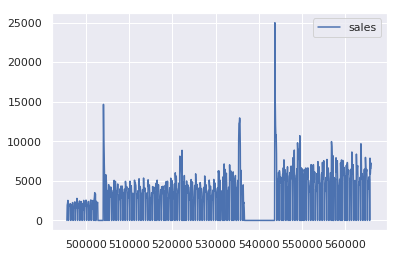

In [436]:
#train = pd.read_csv('../../data/raw/train.csv', low_memory=False)
#train['Date'] = pd.to_datetime(train['Date'])
#len(train[(train.Open == 0) & (train.Date.dt.dayofweek != 6)]) #31680
##train.head()
trainz = train.copy()
trainz['Date'] = pd.to_datetime(trainz['Date'])
trainz['year'] = trainz.Date.dt.year
trainz['month'] = trainz.Date.dt.month
sumz = trainz.groupby(['Store', 'year', 'month']).sum().copy()
sumz.reset_index(level=2, drop=False, inplace=True)
len(sumz[(sumz.Sales == 0) & (sumz.month.isin(range(7)))]) # 17
len(sumz[(sumz.Sales == 0) & (sumz.month.isin(range(7, 13)))]) # 3
len(sumz) # 33485
len(train) #1017209
len(sums) # 34565
len(sumz[(sumz.Sales == 0)]) # 20
(sumz[(sumz.Sales == 0)]) 
#train[(train.Store.isin(stores)) & (train.Date >= '2014-07-01') & (train.Date < '2015-01-01') & (train.Sales > 0)
#     & (train.Store != 708) & (train.Store != 972)]
#train[(train.Store.isin(stores)) & (train.Date >= '2014-07-01') & (train.Date < '2015-01-01') & (train.Sales > 0)]

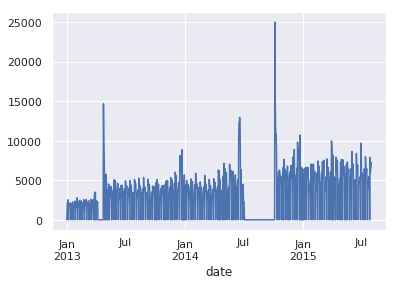

In [476]:
di.loc[di.store == 708, 'sales'].plot()

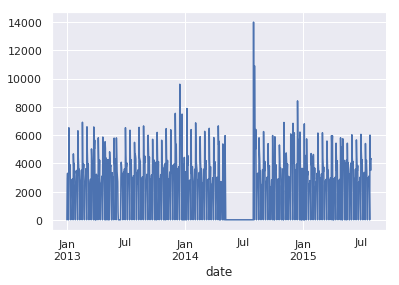

In [478]:
di.loc[di.store == 972, 'sales'].plot()

In [477]:
len(df[df.state == 'BY'])/942

180.0

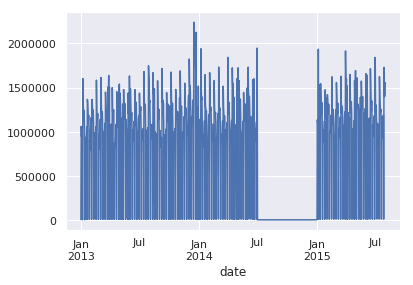

In [479]:
BY_stores = df.loc[df.state == 'BY', 'store'].unique()
#len(stores) #182
di[di.store.isin(BY_stores)].groupby('date').sales.sum().plot();
#df[(df.store.isin(stores)) & (df.date == '2014-12-03') & (df.sales != 0)]
#df.loc[df.store.isin(stores), 'state'].value_counts()/942 # BY 180
#df[df.store == 972] # ST
#df[df.store == 708] # SN

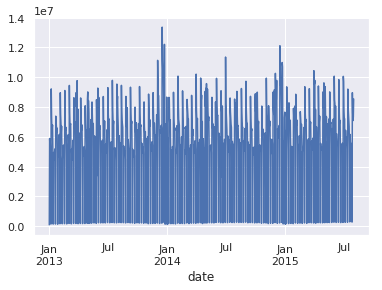

In [615]:
non_stores = di.loc[~di.store.isin(stores)].copy()
non_stores.groupby(non_stores.index).sales.sum().plot();

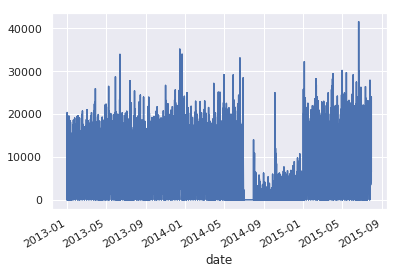

In [439]:
di.loc[di.store.isin(stores), 'sales'].plot()

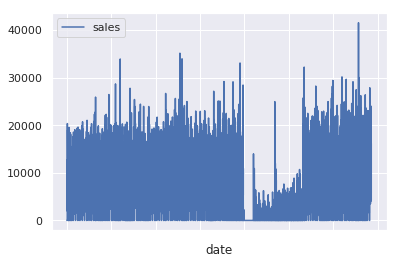

In [342]:
stores = dy.loc[(dy.sales == 0) & (dy.moyr > pd.to_datetime('2014-06')), 'store'].unique()
df.loc[(df.store.isin(stores)), ['date', 'sales']].set_index('date').sort_index().plot()

In [231]:
#dx = di.copy()
#dx = dx['2014-08':'2014-10']
#dx['mnth_yr'] = dx[dx.index].apply(lambda x: x.strftime('%B-%Y'))     
#dx.set_index(['store', dx.index], inplace=True)
#dx.groupby(dx.index[0], dx.index)
#dx.index[0][1]
#dx['mnth_yr'] = dx[dx.index].apply(lambda tup: tup[1].strftime('%B-%Y'))     
#dx.head()
#dx[dx.index].apply(lambda x: x.strftime('%B-%Y'))
dx = df.copy()
dx['date'] = pd.to_datetime(dx['date'])
dx = dx[(dx.date >= '2014-08') & (dx.date <= '2014-09')]
dx['yr-mo'] = dx.date.apply(lambda x: x.strftime('%B-%Y'))
dxg = dx.groupby(['store', 'yr-mo']).sum().copy()
#dxg.loc[dxg.sales == 0, 'store'].nunique()
dxg = dxg.unstack('yr-mo')
dxg.head()


max_temperature_c                mean_temperature_c                 \
yr-mo       August-2014 September-2014        August-2014 September-2014   
store                                                                      
1                   686             19                543             16   
2                   635             17                485             13   
3                   648             19                518             13   
4                   708             17                555             14   
5                   663             16                531             14   

      min_temperature_c                dew_point_c                 \
yr-mo       August-2014 September-2014 August-2014 September-2014   
store                                                               
1                   401             11         462             12   
2                   347             10         409             12   
3                   389              7         443             14   
4                   400             12         421             14   
5                   395             12         426             13   

      mean_dew_point_c                     ...         customers  \
yr-mo      August-2014 September-2014      ...       August-2014   
store                                      ...                     
1                  385             11      ...           13088.0   
2                  336             11      ...           14552.0   
3                  369             12      ...           18372.0   
4                  328             12      ...           34404.0   
5                  352             12      ...           13136.0   

                            open                      promo                 \
yr-mo September-2014 August-2014 September-2014 August-2014 September-2014   
store                                                                        
1              561.0        26.0            1.0        11.0            1.0   
2              805.0        26.0            1.0        11.0            1.0   
3              962.0        26.0            1.0        11.0            1.0   
4             1796.0        26.0            1.0        11.0            1.0   
5              758.0        26.0            1.0        11.0            1.0   

      school_holiday                      trend                 
yr-mo    August-2014 September-2014 August-2014 September-2014  
store                                                           
1               31.0            1.0        2285             74  
2               21.0            0.0        2334             65  
3               13.0            0.0        2363             76  
4               16.0            0.0        2156             68  
5               21.0            0.0        2391             73  

[5 rows x 68 columns]

In [166]:
dm = df.copy()
dm['date'] = pd.to_datetime(dm['date'])
dm['month'] = dm['date'].dt.month
dm['year'] = dm['date'].dt.year
#dm['month'] = pd.DatetimeIndex(dm['date']).month
#dm['year'] = pd.DatetimeIndex(dm['date']).year
dm = dm.query("date >= '2014-08-01' & date <= '2014-09-01'").copy()
#dm.groupby('store').sales.sum().value_counts()
#dm.index[dm.groupby('store').sales.sum() == 0]
#gb = dm.groupby('store').sales
#gb.get_group(sum() == 0)
dm.head()

,store,state,date,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,...,sales,customers,open,promo,state_holiday,school_holiday,trend,week_start,month,year
64624,1,HE,2014-08-01,28,21,15,17,14,12,94,...,5038.0,572.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014
64625,56,HE,2014-08-01,28,21,15,17,14,12,94,...,9516.0,625.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014
64626,69,HE,2014-08-01,28,21,15,17,14,12,94,...,11180.0,1318.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014
64627,77,HE,2014-08-01,28,21,15,17,14,12,94,...,8608.0,702.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014
64628,111,HE,2014-08-01,28,21,15,17,14,12,94,...,8847.0,684.0,1.0,1.0,0,1.0,80,2014-07-27,8,2014


In [146]:
#ds = df.query("date >= pd.to_datetime('2014-08-01') & date <= pd.to_datetime('2014-09-01')")
ds = df.query("date >= '2014-08-01' & date <= '2014-09-01'").copy()
#ds = di['2014-08-01':'2014-09-01'].copy()
ds['date'] = pd.to_datetime(ds.date)
ds['week_start'] = pd.to_datetime(ds.week_start)
#ds.set_index(['store', 'date'], inplace=True)
ds.set_index('date', inplace=True)
ds.sort_index(inplace=True)
#ds.reset_index(level=1, inplace=True)
#tester = di.query()
#tester = di[(di.day_of_week != 6) & (di.sales == 0)]
#len(tester)
#tester.open.value_counts()
#ds[ds.date == pd.to_datetime('2014-08-15')]
#ds[ds.sales.sum() == 0].head()
len(ds[ds.sales == 0])
#ds.head()
sorted(ds.loc[(ds.sales == 0) & (ds.day_of_week != 6), 'state'].unique())

['BW', 'BY', 'HE', 'NW', 'SN', 'ST']

# Promo2 stuff

In [482]:
len(df[df.promo2 == 1])/942 # 571 stores
len(df[(df.promo2 == 1) & (df.state != 'BY')])/942 # 415 stores



415.0

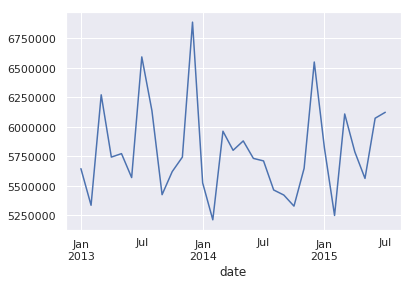

In [78]:
p240 = di[(di.promo2 == 1) & (di.promo2_since_year == 2014.0) & (di.promo2_since_week == 10.0)]
p240.sales.resample('M').sum().plot()

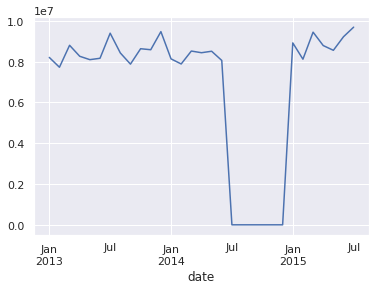

In [73]:
p240 = di[(di.promo2 == 1) & (di.promo2_since_year == 2014.0) & (di.promo2_since_week == 40.0)]
p240.sales.resample('M').sum().plot()

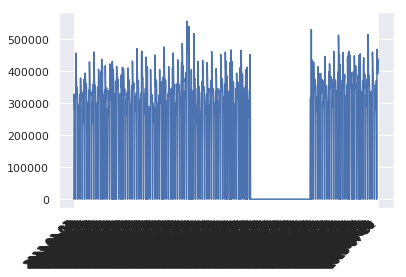

In [71]:
p240 = df[(df.promo2 == 1) & (df.promo2_since_year == 2014.0) & (df.promo2_since_week == 40.0)]
fig, ax = plt.subplots()
ax.plot(p240.groupby('date').sales.sum())
fig.autofmt_xdate(rotation=45, ha='right')

#p240.sales.tail()

In [8]:
df[df.promo2 == 0].groupby('state').store.count() / 942

state
BE        92.0
BW        21.0
BY        24.0
HB,NI     22.0
HE        46.0
HH        25.0
NW       130.0
RP        14.0
SH        77.0
SN        50.0
ST        33.0
TH        10.0
Name: store, dtype: float64

In [7]:
df[df.promo2 == 1].groupby('state').store.count() / 942

state
BW     52.0
BY    156.0
HE     66.0
HH      3.0
NW    156.0
RP     26.0
SH     38.0
SN     25.0
ST     23.0
TH     26.0
Name: store, dtype: float64

In [6]:
autre = df[(df.promo2 == 0) & (df.open == 0)]
len(autre)/len(df)
df.groupby('state').store.count() / 942

state
BE        92.0
BW        73.0
BY       180.0
HB,NI     22.0
HE       112.0
HH        28.0
NW       286.0
RP        40.0
SH       115.0
SN        75.0
ST        56.0
TH        36.0
Name: store, dtype: float64

537882


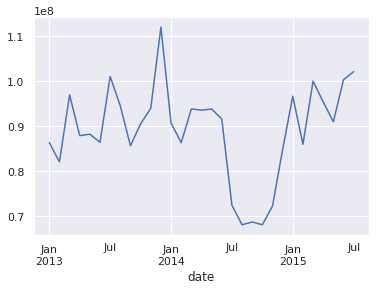

In [13]:
promo2 = di[(di.promo2 == 1)].copy() # len=537,882
#promo2.groupby('date').sales.sum().plot()
#promo2.groupby('date').sales.resample('Q').sum().plot()
print(len(promo2))
promo2.sales.resample('M').sum().plot()

421047


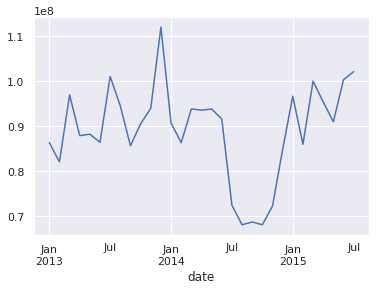

In [9]:
promo2 = di[(di.promo2 == 1) & (di.open == 1)].copy() # len=421,047
#promo2 = di[(di.promo2 == 1)].copy() # len=421,047
#promo2.groupby('date').sales.sum().plot()
#promo2.groupby('date').sales.resample('Q').sum().plot()
print(len(promo2))
promo2.sales.resample('M').sum().plot()

512448


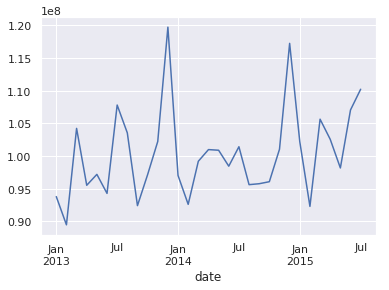

In [10]:
promo2 = di[di.promo2 == 0].copy()
print(len(promo2))
promo2.sales.resample('M').sum().plot()

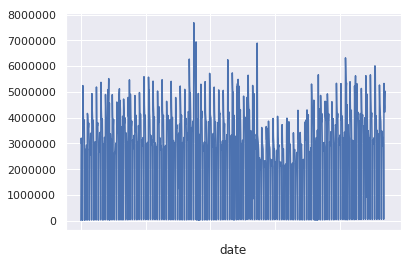

In [12]:
promo2 = df[df.promo2 == 1].copy()
promo2.groupby('date').sales.sum().plot()

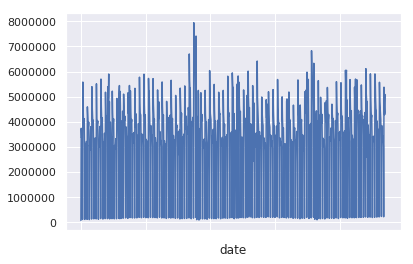

In [11]:
non_promo2 = df[df.promo2 == 0].copy()
non_promo2.groupby('date').sales.sum().plot()

In [ ]:
# The Promo2 sucks!
di['2014-05'].head()
jan.query('date.dt.month in [1,4,7,10]').sales.mean() # 6552
jan.query('date.dt.month not in [1,4,7,10]').sales.mean() # 6832
feb.query('date.dt.month in [2,5,8,11]').sales.mean() # 6556
feb.query('date.dt.month not in [2,5,8,11]').sales.mean() # 6695
mar.query('date.dt.month in [3,6,9,12]').sales.mean() # 6556
mar.query('date.dt.month not in [3,6,9,12]').sales.mean() # 6259

6259.501754712879

In [104]:
# The Promo2 sucks!
jopen = di[di.open == 1].copy()
jan = jopen.query('promo_interval == "Jan,Apr,Jul,Oct" & promo2_since_year <= 2012')
feb = jopen.query('promo_interval == "Feb,May,Aug,Nov" & promo2_since_year <= 2012')
mar = jopen.query('promo_interval == "Mar,Jun,Sept,Dec" & promo2_since_year <= 2012')
none = jopen[jopen.promo_interval == 'None']

jan.query('date.dt.month in [3,6,9,12]').sales.mean() # 7071
jan.query('date.dt.month not in [3,6,9,12]').sales.mean() # 6569
feb.query('date.dt.month in [1,4,7,10]').sales.mean() # 6611
feb.query('date.dt.month not in [1,4,7,10]').sales.mean() # 6675
mar.query('date.dt.month in [2,5,8,11]').sales.mean() # 6363
mar.query('date.dt.month not in [2,5,8,11]').sales.mean() # 6351
len(jan) # 157,824
len(feb) #  50,724
len(mar) #  47,436
len(none)# 423,293
len(jopen) #844,340

844340

In [97]:
# Promo2 stores got a lot better over time. Is it because they sucked to begin with or something else?
start_sales = di['2013-01-02'].sales
end_sales = di['2015-07-31'].sales
diff_pct = (end_sales - start_sales)/start_sales
(np.array(end_sales) - np.array(start_sales)).mean()/start_sales.mean() # .4547

promo2 = di[di.promo2 == 1]
start_sales_promo2 = promo2['2013-01-02'].sales
start_sales_count = len(promo2['2013-01-02'])
end_sales_promo2 = promo2['2015-07-31'].sales
end_sales_count = len(promo2['2015-07-31'])
diff_pct_promo2 = (end_sales - start_sales)/start_sales
(np.array(end_sales_promo2) - np.array(start_sales_promo2)).mean()/start_sales_promo2.mean() # .5665

jan = di[di.promo_interval == 'Jan,Apr,Jul,Oct']
start_sales_jan = jan['2013-01-02'].sales
start_sales_count = len(jan['2013-01-02'])
end_sales_jan = jan['2015-07-31'].sales
end_sales_count = len(jan['2015-07-31'])
diff_pct_jan = (end_sales - start_sales)/start_sales
(np.array(end_sales_jan) - np.array(start_sales_jan)).mean()/start_sales_jan.mean() # .5438

feb = di[di.promo_interval == 'Feb,May,Aug,Nov']
start_sales_feb = feb['2013-01-02'].sales
start_sales_count = len(feb['2013-01-02'])
end_sales_feb = feb['2015-07-31'].sales
end_sales_count = len(feb['2015-07-31'])
diff_pct_feb = (end_sales - start_sales)/start_sales
(np.array(end_sales_feb) - np.array(start_sales_feb)).mean()/start_sales_feb.mean() # .6878

mar = di[di.promo_interval == 'Mar,Jun,Sept,Dec']
start_sales_mar = mar['2013-01-02'].sales
start_sales_count = len(mar['2013-01-02'])
end_sales_mar = mar['2015-07-31'].sales
end_sales_count = len(mar['2015-07-31'])
diff_pct_mar = (end_sales - start_sales)/start_sales
(np.array(end_sales_mar) - np.array(start_sales_mar)).mean()/start_sales_mar.mean() # .4893
start_sales_mar_mth = mar['2013-01'].sales
start_sales_count_mth = len(mar['2013-01'])
end_sales_mar_mth = mar['2015-07'].sales
end_sales_count_mth = len(mar['2015-07'])
(np.array(end_sales_mar_mth) - np.array(start_sales_mar_mth)).mean()/start_sales_mar_mth.mean() # .2165

promo2 = di[di.promo2 == 0].copy()
#start_sales_promo2 = promo2['2013-01-02'].sales
#start_sales_non_count = len(promo2['2013-01-02'])
#end_sales_promo2 = promo2['2015-07-31'].sales
#end_sales_non_count = len(promo2['2015-07-31'])
#diff_pct_promo2 = (end_sales - start_sales)/start_sales
#(np.array(end_sales_promo2) - np.array(start_sales_promo2)).mean()/start_sales_promo2.mean() # .3588
start_sales_promo2_mth = promo2['2013-01'].sales.sum() / len(promo2['2013-01'])
#start_sales_non_count_mth = len(promo2['2013-01'])
end_sales_promo2_mth = promo2['2015-07'].sales.sum() / len(promo2['2015-07'])
#end_sales_non_count_mth = len(promo2['2015-07'])
((end_sales_promo2_mth) - (start_sales_promo2_mth)) /start_sales_promo2_mth # 0.2147

promo2 = di[di.promo2 == 1].copy()
start_sales_mth = promo2['2013-01'].sales.sum() / len(promo2['2013-01'])
end_sales_mth = promo2['2015-07'].sales.sum() / len(promo2['2015-07'])
(np.array(end_sales_mth) - np.array(start_sales_mth))/start_sales_mth

0.1331843403261296

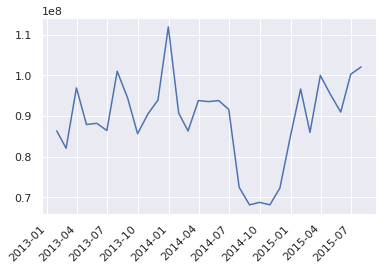

In [98]:
promo2 = di[di.promo2 == 1]
promo2_sales = promo2.groupby(promo2.index).sales.sum()
promo2_store_counts = promo2.groupby(promo2.index).store.count()
fig, ax = plt.subplots()
ax.plot(promo2_sales.resample('M').sum())
fig.autofmt_xdate(rotation=45, ha='right')

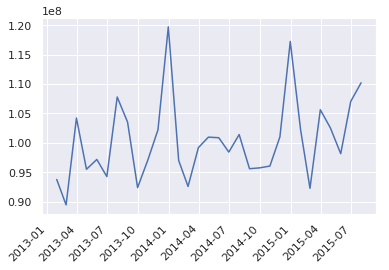

In [99]:
non_promo2 = di[di.promo2 == 0]
non_promo2_sales = non_promo2.groupby(non_promo2.index).sales.sum()
non_promo2_store_counts = non_promo2.groupby(non_promo2.index).store.count()
fig, ax = plt.subplots()
ax.plot(non_promo2_sales.resample('M').sum())
fig.autofmt_xdate(rotation=45, ha='right')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050330 entries, 0 to 1050329
Data columns (total 43 columns):
store                           1050330 non-null int64
state                           1050330 non-null object
date                            1050330 non-null object
max_temperature_c               1050330 non-null int64
mean_temperature_c              1050330 non-null int64
min_temperature_c               1050330 non-null int64
dew_point_c                     1050330 non-null int64
mean_dew_point_c                1050330 non-null int64
min_dew_point_c                 1050330 non-null int64
max_humidity                    1050330 non-null int64
mean_humidity                   1050330 non-null int64
min_humidity                    1050330 non-null int64
max_sea_level_pressureh_pa      1050330 non-null int64
mean_sea_level_pressureh_pa     1050330 non-null int64
min_sea_level_pressureh_pa      1050330 non-null int64
max_visibility_km               1050330 non-null float64
mea

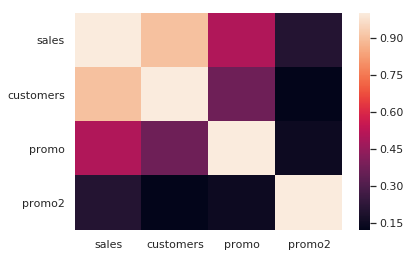

In [6]:
#sns.heatmap(di[['sales', 'customers', 'assortment', 'store_type']])
sns.heatmap(df[['sales', 'customers', 'promo', 'promo2']].corr())

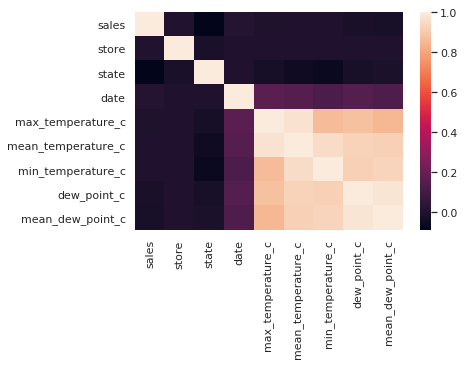

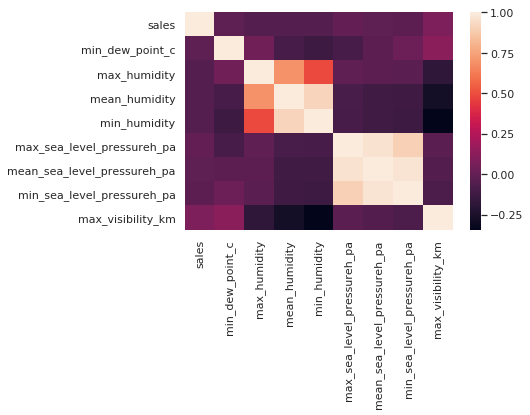

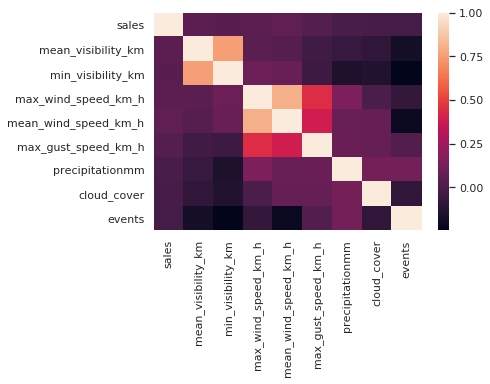

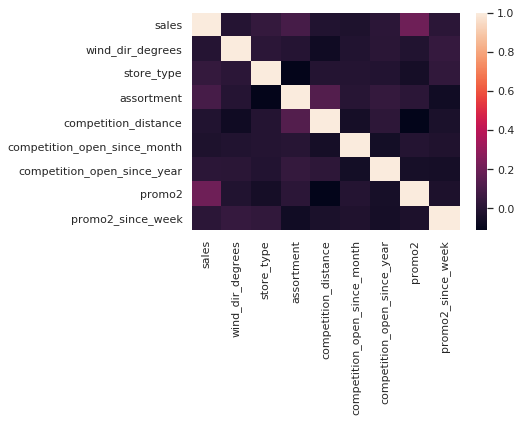

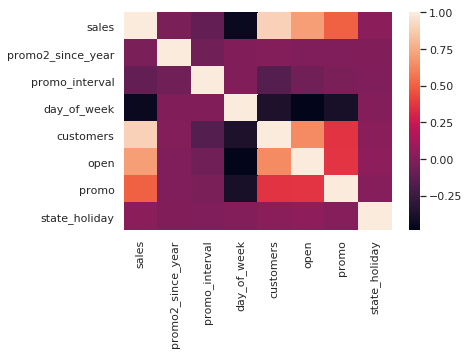

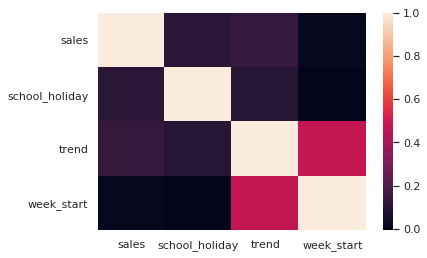

In [53]:
for_heatmap = df.copy()
for col in ['assortment', 'date', 'events', 'promo_interval', 'state', 'state_holiday', 'store_type', 'week_start']:
    for_heatmap[col] = pd.factorize(for_heatmap[col])[0]
num_cols = 8
for i in range(math.ceil(len(tester.columns)/num_cols)):
    temp_df = tester[['sales']].copy()
    for j in range(len(tester.columns)):
        if j // num_charts == i and j != 35:
            temp_df = temp_df.join(tester.iloc[:, j])
    sns.heatmap(temp_df.corr())
    plt.show()

In [9]:
for_heatmap = df.copy()
corrs = for_heatmap.corr()
#corrs['sales'].sort_values(ascending=False)
#abs(for_heatmap.corr()['sales']).sort_values(ascending=False)
#calc = pd.DataFrame(DescrStatsW(temp, temp.WGTP).corrcoef, index=temp.columns, columns=temp.columns).NYCgov_Income
calc = corrs['sales']
calc.reindex(calc.abs().sort_values(ascending=False).index).tail(-1)
#calc[calc.index.duplicated()]

customers                       0.900855
open                            0.704430
promo                           0.503123
day_of_week                    -0.439142
trend                           0.132667
promo2                         -0.119537
school_holiday                  0.103216
max_visibility_km               0.082983
mean_wind_speed_km_h            0.061571
max_wind_speed_km_h             0.051738
mean_visibility_km              0.050962
min_humidity                   -0.049081
max_humidity                   -0.047872
mean_humidity                  -0.047422
min_visibility_km               0.042883
max_gust_speed_km_h             0.030297
competition_open_since_month   -0.023017
min_sea_level_pressureh_pa     -0.022368
mean_dew_point_c               -0.020435
promo2_since_year              -0.018766
min_dew_point_c                -0.017721
dew_point_c                    -0.017577
mean_sea_level_pressureh_pa    -0.014560
promo2_since_week               0.014353
competition_open

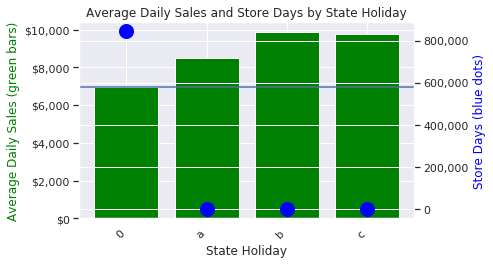

In [61]:
open = df[df.open == 1].copy()

total_sales_by_state_holiday = \
    np.array(open[['state_holiday', 'sales']].groupby('state_holiday').sum()[['sales']]).reshape(-1)
store_counts_by_state_holiday = \
    np.array(open[['state_holiday', 'store']].groupby('state_holiday').count()[['store']]).reshape(-1)
avg_daily_sales_by_state_holiday = \
    total_sales_by_state_holiday / store_counts_by_state_holiday
xs = np.array((open[['state_holiday', 'sales']].groupby('state_holiday').sum()).index)

fig, ax_l = plt.subplots()
ax_r = ax_l.twinx()

ax_l.bar(x=xs, height=avg_daily_sales_by_state_holiday, color='green')
ax_r.plot(xs, store_counts_by_state_holiday, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
#ax_r.set_ylim([0, 550000])

ax_l.set_title('Average Daily Sales and Store Days by State Holiday')
ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
ax_r.set_ylabel('Store Days (blue dots)', color='blue')
ax_l.set_xlabel('State Holiday')
fig.autofmt_xdate(rotation=45, ha='right')
ax_l.axhline(open.sales.mean());

#len(open[open.state_holiday == 'a']) # 694
#len(open[open.state_holiday == 'b']) # 145
#len(open[open.state_holiday == 'c']) # 71
#len(open[open.state_holiday == '0']) # 843,430

In [67]:
open = df[df.open == 1].copy()
#len(open[open.school_holiday == 1]) # 163,445
#len(open[open.school_holiday == 0]) # 680,895

680895

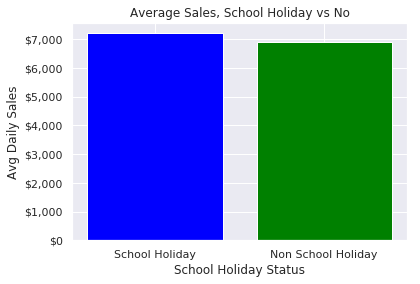

In [56]:
# School holiday vs no
open = df[df.open == 1].copy()

avg_sch_sales = open.loc[open.school_holiday == 1, 'sales'].mean()
avg_non_sch_sales = open.loc[open.school_holiday == 0, 'sales'].mean()

fig, ax = plt.subplots()

ax.bar(x=['School Holiday', 'Non School Holiday'],
       height=[avg_sch_sales, avg_non_sch_sales], color=['blue', 'green'])

ax.set_title('Average Sales, School Holiday vs No')
ax.set_ylabel('Avg Daily Sales')
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('School Holiday Status');

#len(open[open.school_holiday == 1]) # 163,445
#len(open[open.school_holiday == 0]) # 680,895

In [72]:
# Don't use - the one above is fine

#open = df[df.open == 1].copy()

#total_sales_by_school_holiday = \
#    np.array(open[['school_holiday', 'sales']].groupby('school_holiday').sum()[['sales']]).reshape(-1)
#store_counts_by_school_holiday = \
#    np.array(open[['school_holiday', 'store']].groupby('school_holiday').count()[['store']]).reshape(-1)
#avg_daily_sales_by_school_holiday = \
#    total_sales_by_school_holiday / store_counts_by_school_holiday
#xs = np.array((open[['school_holiday', 'sales']].groupby('school_holiday').sum()).index)
#xs = ['School Holiday', 'Non School Holiday']

#fig, ax_l = plt.subplots()
#ax_r = ax_l.twinx()

#ax_l.bar(x=xs, height=avg_daily_sales_by_school_holiday, color='green')
#ax_r.plot(xs, store_counts_by_school_holiday, color='blue', linestyle='none', marker='o', markersize=10, markeredgewidth=5)
#ax_r.set_ylim([0, 550000])

#ax_l.set_title('Average Daily Sales and Store Days by School Holiday')
#ax_l.set_ylabel('Average Daily Sales (green bars)', color='green')
#ax_l.set_yticklabels(['${:,.0f}'.format(x) for x in ax_l.get_yticks()])
#ax_r.set_yticklabels(['{:,.0f}'.format(x) for x in ax_r.get_yticks()])
#ax_r.set_ylabel('Store Days (blue dots)', color='blue')
#ax_l.set_xlabel('School Holiday')
#fig.autofmt_xdate(rotation=45, ha='right')
#ax_l.axhline(open.sales.mean());

# Promo questions

In [680]:
len(df) # 1,050,330
len(df[df.promo == 1]) # 376,877 -- 36% of the time
months = df.copy()
months['year'] = months['date'].dt.year
months['month'] = months['date'].dt.month
#months.groupby(['store', 'year', 'month']).promo.mean().value_counts()
months.groupby(['store', 'year', 'month']).promo.mean()

#months.groupby(['store', 'year', 'month']).promo.sum().value_counts().sum() # 34565
#13454+7251+5893+3198 # 29796

store  year  month
1      2013  1        0.322581
             2        0.357143
             3        0.451613
             4        0.400000
             5        0.354839
             6        0.333333
             7        0.419355
             8        0.387097
             9        0.333333
             10       0.322581
             11       0.333333
             12       0.322581
       2014  1        0.322581
             2        0.357143
             3        0.354839
             4        0.366667
             5        0.354839
             6        0.333333
             7        0.419355
             8        0.354839
             9        0.400000
             10       0.387097
             11       0.500000
             12       0.322581
       2015  1        0.483871
             2        0.357143
             3        0.387097
             4        0.366667
             5        0.322581
             6        0.366667
                        ...   
1115   2013  2      

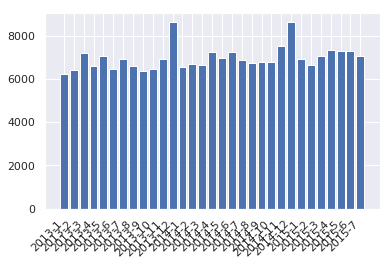

In [666]:
#import matplotlib.dates as mdates
#myFmt = mdates.DateFormatter('%q')

open = months[months.open == 1].copy()
pic = (open.groupby(['year','month']).sales.mean())
fig, ax = plt.subplots()
#dates = [f'{year}-{month}' for year, month in pic.index]
ax.bar(x=dates, height=pic)
fig.autofmt_xdate(rotation=45, ha='right')
#ax.xaxis.set_major_formatter(myFmt)
#len(dates) #31
#len(pic) #31

In [649]:
promos = months.groupby(['store', 'year', 'month']).sum()
promos.reset_index(level=[1,2], drop=False, inplace=True)
#promos.loc[(promos.promo == 15) & (~promos.month.isin([1, 11])), ['promo', 'month']] # 14 instances in March 2013
#len(promos.loc[(promos.promo == 15) & (promos.month == 11) & (promos.year == 2014), ['promo', 'month']]) # 935 instances in Nov 2014
#len(promos.loc[(promos.promo == 15) & (promos.month == 1) & (promos.year == 2015), ['promo', 'month']]) # 808 instances in Jan 2015
#len(promos.loc[(promos.promo == 0) & (promos.month == 1) & (promos.year == 2015), ['promo', 'month']]) # 808 instances in Jan 2015
#if a store isn't running any promos all month, it's probably closed all month:
#len(promos[(promos.promo == 0) & (~promos.index.isin(BY_stores))]) # 24 

24

In [678]:
# Compare months with 10 vs months with 15
promos.loc[promos.promo == 10].month.value_counts() # Dec, Jun, Oct

2     3294
12    2050
1     1910
6     1791
10    1116
9     1111
5     1095
11    1040
3       35
4        5
8        5
7        2
Name: month, dtype: int64

0 0
1 66121
2 71673
3 94714
4 77406
5 66963
0.8287270421081884
0.4077987348057752
0.25214708086583965
0.1433750163319328
-0.053823529966233706
208193.37374349358 0.0


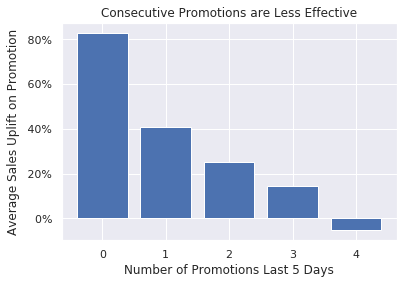

In [50]:
# The first promo was on 2013-01-07, so a rolling 5-day window with nans filled with zero is all correct
roll5 = df.copy()
roll5.set_index(['store', 'date'], inplace=True)
roll5.sort_index(inplace=True)
roll5['promo_last_5'] = roll5.promo.rolling(5).mean()
roll5['promo_last_5'].fillna(0, inplace=True)
roll5['uplift'] = roll5.sales / roll5.sales.rolling(5).mean() - 1
roll5['uplift'].fillna(0, inplace=True)
xs = [0, 1, 2, 3, 4]
heights = roll5[roll5.promo == 1].groupby('promo_last_5').uplift.mean().values

fig, ax = plt.subplots()
ax.bar(x=xs, height=heights)
ax.set_title('Consecutive Promotions are Less Effective')
ax.set_xlabel('Number of Promotions Last 5 Days')
ax.set_ylabel('Average Sales Uplift on Promotion')
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()]) ;
for i in range(6):
    print(i, len(roll5[(roll5.promo == 1) & (roll5.promo_last_5 == i/5)]))
    
from scipy import stats

lists = []
for i in range(1,6):
    lists.append(roll5[(roll5.promo == 1) & (roll5.promo_last_5 == i/5)].uplift.values)
    print(roll5[(roll5.promo == 1) & (roll5.promo_last_5 == i/5)].uplift.values.mean())
    #print(type(roll5[(roll5.promo == 1) & (roll5.promo_last_5 == i/5)].uplift.values))
    #print(roll5[(roll5.promo == 1) & (roll5.promo_last_5 == i/5)].uplift)
#print(lists)
f_val, p_val = stats.f_oneway(*lists)   
print(f_val, p_val)

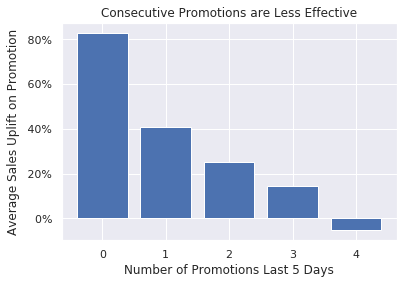

In [31]:
# The first promo was on 2013-01-07, so a rolling 5-day window with nans filled with zero is all correct
roll5 = df.copy()
roll5.set_index(['store', 'date'], inplace=True)
roll5.sort_index(inplace=True)
roll5['promo_last_5'] = roll5.promo.rolling(5).mean()
roll5['promo_last_5'].fillna(0, inplace=True)
roll5['sales_last_5'] = roll5.sales.rolling(5).mean()
roll5['sales_last_5'].fillna(0, inplace=True)
roll5['uplift'] = roll5.sales / roll5.sales_last_5
roll5['uplift'].fillna(0, inplace=True)
xs = [0, 1, 2, 3, 4]
heights = roll5[roll5.promo == 1].groupby('promo_last_5').uplift.mean().values - 1
#heights # array([1.82869679, 1.40779873, 1.25214708, 1.14337502, 0.94617647])

fig, ax = plt.subplots()
ax.bar(x=xs, height=heights)
ax.set_title('Consecutive Promotions are Less Effective')
ax.set_xlabel('Number of Promotions Last 5 Days')
#ax.axhline(y=0, color='red')
ax.set_ylabel('Average Sales Uplift on Promotion')
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()]) ;

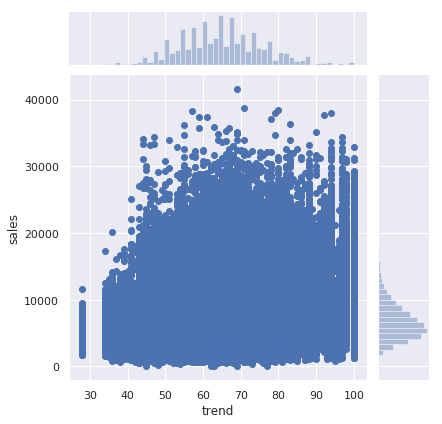

In [73]:
#sns.jointplot('sales', 'trend', data=df[df.open == 1])
sns.jointplot('trend', 'sales', data=df[df.open == 1])

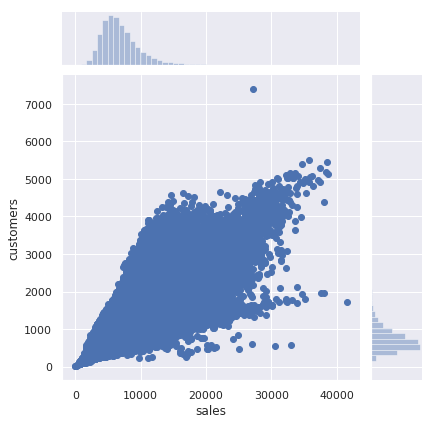

In [68]:
sns.jointplot('sales', 'customers', data=df[df.open == 1])

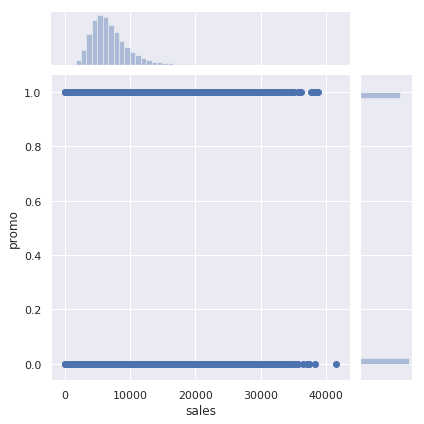

In [69]:
sns.jointplot('sales', 'promo', data=df[df.open == 1])

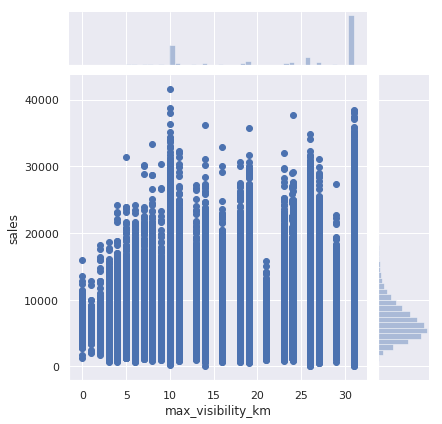

In [72]:
#sns.jointplot('sales', 'max_visibility_km', data=df[df.open == 1])
sns.jointplot('max_visibility_km', 'sales', data=df[df.open == 1])

In [ ]:
sales                           1.000000
customers                       0.900855
open                            0.704430
promo                           0.503123
promo2                          0.201789
trend                           0.132667
school_holiday                  0.103216
assortment                      0.094887
max_visibility_km               0.082983
mean_wind_speed_km_h            0.061571
max_wind_speed_km_h             0.051738
mean_visibility_km              0.050962
store_type                      0.042900
min_visibility_km               0.042883
state_holiday                   0.032229
max_gust_speed_km_h             0.030297
promo2_since_week               0.014353
competition_open_since_year     0.013752
date                            0.011703

In [15]:
df.corr()

,store,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,min_humidity,...,promo2,promo2_since_week,promo2_since_year,day_of_week,sales,customers,open,promo,school_holiday,trend
store,1.000000e+00,-0.001047,0.000366,0.001888,-0.000547,-0.000565,0.000234,-0.004302,-0.000796,-0.002559,...,7.486424e-03,5.500725e-03,2.875242e-02,1.091668e-18,0.006779,0.025010,0.002657,0.000973,0.001239,0.005983
max_temperature_c,-1.046624e-03,1.000000,0.972386,0.864136,0.880348,0.854839,0.799926,-0.221484,-0.577705,-0.636754,...,5.098038e-03,-8.830362e-03,4.162237e-03,1.287383e-03,-0.002195,0.003898,0.010967,0.034931,0.129745,0.112121
mean_temperature_c,3.658153e-04,0.972386,1.000000,0.953882,0.928568,0.919173,0.881007,-0.224025,-0.495079,-0.532921,...,-1.092750e-02,-1.626814e-02,9.577386e-04,2.350889e-03,-0.000982,0.006661,0.007423,0.032288,0.136724,0.134766
min_temperature_c,1.887764e-03,0.864136,0.953882,1.000000,0.922795,0.935376,0.922537,-0.202221,-0.341814,-0.349275,...,-2.480422e-02,-1.952538e-02,-2.281309e-03,2.190016e-03,-0.001029,0.006909,-0.000403,0.026723,0.135419,0.154961
dew_point_c,-5.471557e-04,0.880348,0.928568,0.922795,1.000000,0.980360,0.933473,0.030783,-0.201346,-0.281488,...,9.859235e-04,-3.684386e-03,3.192716e-03,1.083831e-02,-0.017577,-0.010796,-0.012238,0.013903,0.116939,0.141413
mean_dew_point_c,-5.647867e-04,0.854839,0.919173,0.935376,0.980360,1.000000,0.973602,0.048288,-0.138876,-0.209629,...,1.313010e-03,-3.505065e-03,3.599145e-03,3.307589e-03,-0.020435,-0.012664,-0.014936,0.015774,0.117009,0.143392
min_dew_point_c,2.342042e-04,0.799926,0.881007,0.922537,0.933473,0.973602,1.000000,0.048798,-0.089087,-0.134456,...,-5.013762e-04,-6.256995e-03,3.202967e-03,-1.515431e-03,-0.017721,-0.009744,-0.012484,0.021248,0.110787,0.144257
max_humidity,-4.301892e-03,-0.221484,-0.224025,-0.202221,0.030783,0.048288,0.048798,1.000000,0.700006,0.486053,...,5.891541e-02,5.770957e-02,4.682838e-03,5.927527e-03,-0.047872,-0.052523,-0.049336,-0.031956,-0.053440,-0.023039
mean_humidity,-7.957404e-04,-0.577705,-0.495079,-0.341814,-0.201346,-0.138876,-0.089087,0.700006,1.000000,0.917698,...,5.604552e-02,5.609994e-02,1.392521e-03,-1.326603e-03,-0.047422,-0.053978,-0.058184,-0.044750,-0.089921,-0.010180
min_humidity,-2.558878e-03,-0.636754,-0.532921,-0.349275,-0.281488,-0.209629,-0.134456,0.486053,0.917698,1.000000,...,4.976948e-02,5.037994e-02,9.706263e-03,3.179083e-03,-0.049081,-0.057516,-0.060245,-0.040851,-0.098157,-0.015369


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050330 entries, 0 to 1050329
Data columns (total 43 columns):
store                           1050330 non-null int64
state                           1050330 non-null object
date                            1050330 non-null datetime64[ns]
max_temperature_c               1050330 non-null int64
mean_temperature_c              1050330 non-null int64
min_temperature_c               1050330 non-null int64
dew_point_c                     1050330 non-null int64
mean_dew_point_c                1050330 non-null int64
min_dew_point_c                 1050330 non-null int64
max_humidity                    1050330 non-null int64
mean_humidity                   1050330 non-null int64
min_humidity                    1050330 non-null int64
max_sea_level_pressureh_pa      1050330 non-null int64
mean_sea_level_pressureh_pa     1050330 non-null int64
min_sea_level_pressureh_pa      1050330 non-null int64
max_visibility_km               1050330 non-null flo

In [19]:
df.columns

Index(['store', 'state', 'date', 'max_temperature_c', 'mean_temperature_c',
       'min_temperature_c', 'dew_point_c', 'mean_dew_point_c',
       'min_dew_point_c', 'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressureh_pa', 'mean_sea_level_pressureh_pa',
       'min_sea_level_pressureh_pa', 'max_visibility_km', 'mean_visibility_km',
       'min_visibility_km', 'max_wind_speed_km_h', 'mean_wind_speed_km_h',
       'max_gust_speed_km_h', 'precipitationmm', 'cloud_cover', 'events',
       'wind_dir_degrees', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'promo_interval',
       'day_of_week', 'sales', 'customers', 'open', 'promo', 'state_holiday',
       'school_holiday', 'trend', 'week_start'],
      dtype='object')

In [25]:
df.corr()

,store,max_temperature_c,mean_temperature_c,min_temperature_c,dew_point_c,mean_dew_point_c,min_dew_point_c,max_humidity,mean_humidity,min_humidity,...,promo2,promo2_since_week,promo2_since_year,day_of_week,sales,customers,open,promo,school_holiday,trend
store,1.000000e+00,-0.001047,0.000366,0.001888,-0.000547,-0.000565,0.000234,-0.004302,-0.000796,-0.002559,...,7.486424e-03,5.500725e-03,2.875242e-02,1.091668e-18,0.006779,0.025010,0.002657,0.000973,0.001239,0.005983
max_temperature_c,-1.046624e-03,1.000000,0.972386,0.864136,0.880348,0.854839,0.799926,-0.221484,-0.577705,-0.636754,...,5.098038e-03,-8.830362e-03,4.162237e-03,1.287383e-03,-0.002195,0.003898,0.010967,0.034931,0.129745,0.112121
mean_temperature_c,3.658153e-04,0.972386,1.000000,0.953882,0.928568,0.919173,0.881007,-0.224025,-0.495079,-0.532921,...,-1.092750e-02,-1.626814e-02,9.577386e-04,2.350889e-03,-0.000982,0.006661,0.007423,0.032288,0.136724,0.134766
min_temperature_c,1.887764e-03,0.864136,0.953882,1.000000,0.922795,0.935376,0.922537,-0.202221,-0.341814,-0.349275,...,-2.480422e-02,-1.952538e-02,-2.281309e-03,2.190016e-03,-0.001029,0.006909,-0.000403,0.026723,0.135419,0.154961
dew_point_c,-5.471557e-04,0.880348,0.928568,0.922795,1.000000,0.980360,0.933473,0.030783,-0.201346,-0.281488,...,9.859235e-04,-3.684386e-03,3.192716e-03,1.083831e-02,-0.017577,-0.010796,-0.012238,0.013903,0.116939,0.141413
mean_dew_point_c,-5.647867e-04,0.854839,0.919173,0.935376,0.980360,1.000000,0.973602,0.048288,-0.138876,-0.209629,...,1.313010e-03,-3.505065e-03,3.599145e-03,3.307589e-03,-0.020435,-0.012664,-0.014936,0.015774,0.117009,0.143392
min_dew_point_c,2.342042e-04,0.799926,0.881007,0.922537,0.933473,0.973602,1.000000,0.048798,-0.089087,-0.134456,...,-5.013762e-04,-6.256995e-03,3.202967e-03,-1.515431e-03,-0.017721,-0.009744,-0.012484,0.021248,0.110787,0.144257
max_humidity,-4.301892e-03,-0.221484,-0.224025,-0.202221,0.030783,0.048288,0.048798,1.000000,0.700006,0.486053,...,5.891541e-02,5.770957e-02,4.682838e-03,5.927527e-03,-0.047872,-0.052523,-0.049336,-0.031956,-0.053440,-0.023039
mean_humidity,-7.957404e-04,-0.577705,-0.495079,-0.341814,-0.201346,-0.138876,-0.089087,0.700006,1.000000,0.917698,...,5.604552e-02,5.609994e-02,1.392521e-03,-1.326603e-03,-0.047422,-0.053978,-0.058184,-0.044750,-0.089921,-0.010180
min_humidity,-2.558878e-03,-0.636754,-0.532921,-0.349275,-0.281488,-0.209629,-0.134456,0.486053,0.917698,1.000000,...,4.976948e-02,5.037994e-02,9.706263e-03,3.179083e-03,-0.049081,-0.057516,-0.060245,-0.040851,-0.098157,-0.015369


In [28]:
len(corrs)
len(corrs.columns)

35

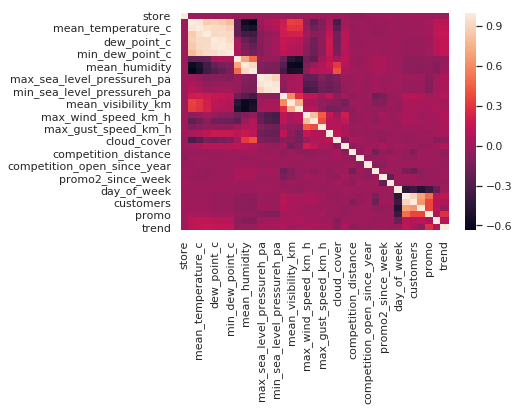

In [26]:
corrs = df.corr()
sns.heatmap(corrs)

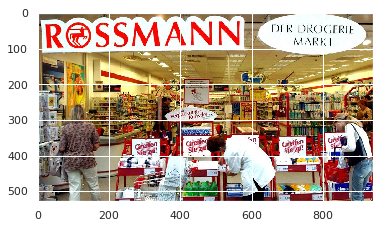

In [11]:
img = plt.imread('rossmann.png')
plt.imshow(img)

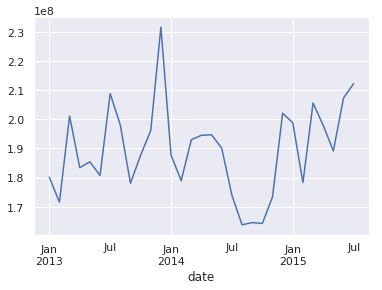

In [41]:
di = df.copy()
di.set_index('date', inplace=True)
di.sales.resample('M').sum().plot()

In [82]:
no_cats = df.copy()
#no_cats.dtypes[no_cats.dtypes == 'object']
# state, events, store_type, assortment, promo_interval, state_holiday, week_start
no_cats.replace({'assortment': {'a': 0, 'b': 1, 'c': 2}, 'store_type': {'a': 0, 'b': 1, 'c': 2, 'd': 3}, 
    'promo_interval': {'None': 0, 'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3}, 
    'state_holiday': {'0': 0, 'a': 1, 'b': 2, 'c': 3}, 'state': {'BE': 0, 'BW': 1, 'BY': 2, 'HB,NI': 3,
    'HE': 4, 'HH': 5, 'NW': 6, 'RP': 7, 'SH': 8, 'SN': 9, 'ST': 10, 'TH': 11}}, inplace=True)
no_cats['week_start'] = pd.to_datetime(no_cats.week_start)
no_cats['week_start'] = no_cats['week_start'] - pd.to_datetime('2012-12-30')
no_cats['week_start'] = no_cats['week_start'].dt.days
no_cats.week_start.max()
no_cats.corr()['sales']

store                           0.006779
state                           0.007250
max_temperature_c              -0.002195
mean_temperature_c             -0.000982
min_temperature_c              -0.001029
dew_point_c                    -0.017577
mean_dew_point_c               -0.020435
min_dew_point_c                -0.017721
max_humidity                   -0.047872
mean_humidity                  -0.047422
min_humidity                   -0.049081
max_sea_level_pressureh_pa     -0.000850
mean_sea_level_pressureh_pa    -0.014560
min_sea_level_pressureh_pa     -0.022368
max_visibility_km               0.082983
mean_visibility_km              0.050962
min_visibility_km               0.042883
max_wind_speed_km_h             0.051738
mean_wind_speed_km_h            0.061571
max_gust_speed_km_h             0.030297
precipitationmm                -0.006101
cloud_cover                    -0.010658
wind_dir_degrees               -0.001720
store_type                     -0.022359
assortment      